# PART 1: GATHERING AND MANIPULATING DATA

In [1]:
%matplotlib inline
import pandas_datareader.data as web
import pandas as pd
pd.set_option('display.max_columns', 1000)
import numpy as np
import matplotlib.pyplot as plt
import quandl
with open('/Users/Mavis/Desktop/Python/Quandl-API.txt', 'r') as f:
    key = f.read()
quandl.ApiConfig.api_key = key
from bs4 import BeautifulSoup 
import csv
import time
import requests
import lxml
import re
from datetime import datetime, timedelta
import pickle
import os

In [2]:
# def save_sp500_tickers():
#     resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
#     soup = bs.BeautifulSoup(resp.text, 'lxml')
#     table = soup.find('table', {'class': 'wikitable sortable'})
#     tickers = []
#     for row in table.findAll('tr')[1:]: # tr means table row
#         #ticker = row.findAll('td')[0].text # td means table data, we want first column of table
#         ticker = row.find_all('td')[0].text.replace('.', '-')
#         ticker = ticker[:-1] # deleting last character '\n'
#         tickers.append(ticker)
        
#     with open('sp500tickers.pickle', 'wb') as f:
#         pickle.dump(tickers, f) # dump tickers in a file f
        
#         print(tickers)
#         return tickers
    
# save_sp500_tickers()

In [3]:
# def get_data_from_yahoo(reload_sp500=False):
#     if reload_sp500:
#         tickers = save_sp500_tickers()
#     else:
#         with open("sp500tickers.pickle", "rb") as f:
#             tickers = pickle.load(f)
        
#     if not os.path.exists('stock_dfs'):
#         os.makedirs('stock_dfs')
          
#     start = dt.datetime(2000,1,1)
#     #end = dt.datetime(2019,8,16)
#     end = dt.datetime.now()
    
    
#     for ticker in tickers:
#         if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
#             df = web.DataReader(ticker, 'yahoo', start, end)
#             df.to_csv('stock_dfs/{}.csv'.format(ticker))

#         else:
#             print('Already had {}'.format(ticker))
    
        
# get_data_from_yahoo()  

In [4]:
# def combine_data():
#     with open('sp500tickers.pickle', 'rb') as f:
#         tickers = pickle.load(f)
        
#     main_df = pd.DataFrame()
#     for count, ticker in enumerate(tickers):
#         df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
#         df.set_index('Date', inplace=True)
        
#         df.rename(columns={'Adj Close': ticker}, inplace=True)
#         df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis = 1, inplace=True)
        
#         if main_df.empty:
#             main_df = df
#         else:
#             main_df = main_df.join(df, how='outer')
            
#         if count%10 == 0:
#             print(count)
            
#     print(main_df.head())
#     main_df.to_csv('sp500_joined_closes.csv')
    
# combine_data()

In [5]:
# def update_sp500():
#     with open("sp500tickers.pickle", "rb") as f:
#             tickers = pickle.load(f)
#     for ticker in tickers:
#         try:
#             with open('/Users/Mavis/Desktop/Python/Sentdex/Finance/stock_dfs/{}.csv'.format(ticker), 'a') as f:
#                 start = dt.datetime(2019, 11, 23)
#                 end = dt.datetime.now()
#                 df = web.DataReader(ticker, 'yahoo', start, end)
#                 df.to_csv(f, header=False)
#         except Exception as e:
#             pass
# update_sp500()

In [6]:
#sp500_tickers = ['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK-B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EOG', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'EVRG', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'FOXA', 'FOX', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'GWW', 'HAL', 'HBI', 'HOG', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HFC', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'HII', 'IEX', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JKHY', 'JEC', 'JBHT', 'JEF', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LHX', 'LH', 'LRCX', 'LW', 'LEG', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MKC', 'MXIM', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'MYL', 'NDAQ', 'NOV', 'NKTR', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTN', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'SHW', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SYK', 'STI', 'SIVB', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'FTI', 'TFX', 'TXN', 'TXT', 'TMO', 'TIF', 'TWTR', 'TJX', 'TSS', 'TSCO', 'TDG', 'TRV', 'TRIP', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WAB', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WCG', 'WFC', 'WELL', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']
# with open("/Users/Mavis/Desktop/Python/Sentdex/Finance/sp500tickers.pickle", "rb") as f:
#     sp500_tickers = pickle.load(f)

# headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:69.0) Gecko/20100101 Firefox/69.0'}

# url = 'https://www.macrotrends.net/stocks/charts/{}/jpmorgan-chase/debt-equity-ratio'

# def get_DE():
#     #df = pd.DataFrame(columns = ['Date', 'Unix', 'Ticker', 'DERatio'])
#     csvFile = open('~/Desktop/Python/Projects/DE_sp500.csv', 'a')
#     csvWriter = csv.writer(csvFile)
#     for ticker in sp500_tickers:
#         resp = requests.get(url.format(ticker), headers=headers)
#         time.sleep(3)
        
#         if resp.status_code == requests.codes.ok:
#             bs = BeautifulSoup(resp.text, "lxml")
        
#             table = bs.find('table', {'class': 'table'})
#             body = table.find('tbody')
#             for row in body.findAll('tr'):
#                 date_stamp = datetime.strptime(row.findAll('td')[0].text, "%Y-%m-%d")
#                 unix_time = time.mktime(date_stamp.timetuple())
#                 ticker = ticker
#                 value = float(row.findAll('td')[-1].text)
#                 #df = df.append({'Date': date_stamp, 'Unix': unix_time, 'Ticker': ticker, 'DERatio': value},
#                 #               ignore_index = True)
#                 csvWriter.writerow([date_stamp, unix_time, ticker, value])

# get_DE()       

In [7]:
df = pd.read_csv('DE_sp500.csv', header = None, names = ['Date', 'Unix', 'Ticker', 'DERatio'])
df.Date = pd.to_datetime(df.Date, format="%m/%d/%y %H:%M")
df.head()

,Date,Unix,Ticker,DERatio
0,2019-09-30,1569816000,MMM,1.68
1,2019-06-30,1561867200,MMM,1.53
2,2019-03-31,1554004800,MMM,1.65
3,2018-12-31,1546232400,MMM,1.36
4,2018-09-30,1538280000,MMM,1.31


SOME DAYS FALL ON SATURDAY OR SUNDAY, WE NEED TO CONVERT THEM TO THE CLOSET BUSINESS DAY

In [8]:
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, \
    USMartinLutherKingJr, USPresidentsDay, GoodFriday, USMemorialDay, \
    USLaborDay, USThanksgivingDay
from pandas.tseries.offsets import BDay, CDay
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

class USTradingCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('NewYearsDay', month=1, day=1, observance=nearest_workday),
        USMartinLutherKingJr,
        USPresidentsDay,
        GoodFriday,
        USMemorialDay,
        Holiday('USIndependenceDay', month=7, day=4, observance=nearest_workday),
        USLaborDay,
        USThanksgivingDay,
        Holiday('Christmas', month=12, day=25, observance=nearest_workday)
    ]


def get_trading_close_holidays(year):
    inst = USTradingCalendar()

US_BUSINESS_DAY = CustomBusinessDay(calendar=USTradingCalendar())
df.Date = df.Date.map(lambda x: x - US_BUSINESS_DAY if x.dayofweek > 4 else x)
df.Date = df.Date.map(lambda x: x - timedelta(days = 3) if x == datetime(2010, 5, 31) else x)
df.Unix = [time.mktime(date_stamp.timetuple()) for date_stamp in df.Date]
df.head()

,Date,Unix,Ticker,DERatio
0,2019-09-30,1.569816e+09,MMM,1.68
1,2019-06-28,1.561694e+09,MMM,1.53
2,2019-03-29,1.553832e+09,MMM,1.65
3,2018-12-31,1.546232e+09,MMM,1.36
4,2018-09-28,1.538107e+09,MMM,1.31


In [9]:
df_full = pd.read_csv('~/Desktop/Python/Sentdex/Finance/sp500_joined_closes.csv',
                      index_col = 'Date', parse_dates = True)
df_full.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,AGN,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,ANTM,AON,AOS,APA,AIV,AAPL,AMAT,APTV,ADM,ARNC,ANET,AJG,AIZ,ATO,T,ADSK,ADP,AZO,AVB,AVY,BKR,BLL,BAC,BK,BAX,BBT,BDX,BRK-B,BBY,BIIB,BLK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BF-B,CHRW,COG,CDNS,CPB,COF,CPRI,CAH,KMX,CCL,CAT,CBOE,CBRE,CBS,CDW,CE,CNC,CNP,CTL,CERN,CF,SCHW,CHTR,CVX,CMG,CB,CHD,CI,XEC,CINF,CTAS,CSCO,C,CFG,CTXS,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,CXO,COP,ED,STZ,COO,CPRT,GLW,CTVA,COST,COTY,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,FANG,DLR,DFS,DISCA,DISCK,DISH,DG,DLTR,D,DOV,DOW,DTE,DUK,DRE,DD,DXC,ETFC,EMN,ETN,EBAY,ECL,EIX,EW,EA,EMR,ETR,EOG,EFX,EQIX,EQR,ESS,EL,EVRG,ES,RE,EXC,EXPE,EXPD,EXR,XOM,FFIV,FB,FAST,FRT,FDX,FIS,FITB,FE,FRC,FISV,FLT,FLIR,FLS,FMC,F,FTNT,FTV,FBHS,FOXA,FOX,BEN,FCX,GPS,GRMN,IT,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,GWW,HRB,HAL,HBI,HOG,HIG,HAS,HCA,PEAK,HP,HSIC,HSY,HES,HPE,HLT,HFC,HOLX,HD,HON,HRL,HST,HPQ,HUM,HBAN,HII,IEX,IDXX,INFO,ITW,ILMN,IR,INTC,ICE,IBM,INCY,IP,IPG,IFF,INTU,ISRG,IVZ,IPGP,IQV,IRM,JKHY,JEC,JBHT,SJM,JNJ,JCI,JPM,JNPR,KSU,K,KEY,KEYS,KMB,KIM,KMI,KLAC,KSS,KHC,KR,LB,LHX,LH,LRCX,LW,LVS,LEG,LDOS,LEN,LLY,LNC,LIN,LKQ,LMT,L,LOW,LYB,MTB,MAC,M,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MKC,MXIM,MCD,MCK,MDT,MRK,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MHK,TAP,MDLZ,MNST,MCO,MS,MOS,MSI,MSCI,MYL,NDAQ,NOV,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NLSN,NKE,NI,NBL,JWN,NSC,NTRS,NOC,NLOK,NCLH,NRG,NUE,NVDA,NVR,ORLY,OXY,OMC,OKE,ORCL,PCAR,PKG,PH,PAYX,PYPL,PNR,PBCT,PEP,PKI,PRGO,PFE,PM,PSX,PNW,PXD,PNC,PPG,PPL,PFG,PG,PGR,PLD,PRU,PEG,PSA,PHM,PVH,QRVO,PWR,QCOM,DGX,RL,RJF,RTN,O,REG,REGN,RF,RSG,RMD,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SPG,SWKS,SLG,SNA,SO,LUV,SWK,SBUX,STT,SYK,STI,SIVB,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TGT,TEL,FTI,TFX,TXN,TXT,TMO,TIF,TWTR,TJX,TSCO,TDG,TRV,TRIP,TSN,UDR,ULTA,USB,UAA,UA,UNP,UAL,UNH,UPS,URI,UTX,UHS,UNM,VFC,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VIAB,V,VNO,VMC,WAB,WMT,WBA,DIS,WM,WAT,WEC,WCG,WFC,WELL,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,26.585411,9.714566,NaN,18.25000,NaN,1.235628,16.274673,15.500,NaN,28.784729,23.850950,5.408165,44.500675,18.887125,321.250,7.756776,5.625608,15.394586,7.37500,NaN,NaN,29.479746,NaN,5.411437,14.545648,NaN,NaN,1.900731,89.3750,NaN,12.094786,NaN,12.671745,34.997250,1021.165222,25.404301,NaN,NaN,3.137073,1.864715,51.560871,3.701598,30.930214,2.765625,NaN,27.734362,0.650708,11.834684,14.077783,3.478462,24.176647,NaN,7.131048,66.167610,NaN,7.848808,NaN,8.875327,17.822012,8.052903,27.192877,30.5625,15.329775,42.388889,NaN,0.872893,12.108177,25.953321,8.424398,12.921294,19.207367,35.299999,18.121763,31.083334,11.476866,25.894598,307.500,2.314942,12.544026,11.50000,29.354719,NaN,NaN,4.074861,6.950564,0.694188,22.0625,21.155031,36.525997,NaN,17.303251,1.12500,28.816648,12.037990,NaN,NaN,NaN,NaN,NaN,NaN,6.199788,16.715542,2.541633,NaN,20.237679,NaN,17.623112,NaN,7.417194,2.046002,23.589418,NaN,13.838064,27.019138,42.133854,332.565002,NaN,50.301048,28.977871,NaN,15.845797,12.211302,1.936630,20.476583,12.577207,25.469854,8.878827,NaN,6.944692,13.009391,5.885598,14.429017,3.250000,31.220701,NaN,32.517567,NaN,24.775211,3.525484,4.236246,14.042373,2.584659,5.673545,6.576631,2.291667,14.124703,NaN,6.986807,13.400675,NaN,NaN,NaN,NaN,NaN,33.913342,NaN,10.861111,6.116259,17.206295,NaN,12.285045,22.227282,6.141090,38.312813,26.283125,249.770477,12.202322,4.554770,7.349213,14.748858,14.62

In [10]:
df_full = df_full.reset_index()
df_long = pd.melt(df_full, id_vars = 'Date')
df_long.columns = ['Date', 'Ticker', 'Price']
df_long.head()

,Date,Ticker,Price
0,2000-01-03,MMM,26.585411
1,2000-01-04,MMM,25.529045
2,2000-01-05,MMM,26.268497
3,2000-01-06,MMM,28.381254
4,2000-01-07,MMM,28.944662


In [11]:
# df_long.Price = df_long.groupby('Ticker')['Price'].apply(lambda group: group.interpolate().ffill().bfill())
# sum(df_long.Price.isnull())

In [12]:
# sp500_df = web.DataReader('^GSPC', 'yahoo', '2000/01/01', '2019/11/29')
# sp500_df = sp500_df[['Adj Close']]
# sp500_df.tail()

In [13]:
import yfinance as yf

sp500_df = yf.download('^GSPC', start='2000-01-01', end='2019-11-29')


[*********************100%***********************]  1 of 1 completed


In [14]:
# sp500_df=sp500_df.reset_index()
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [15]:
# def get_sp500():
#     val = []
#     for unix_time in df.Unix:
#         try: 
#             sp500_date = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
#             row = sp500_df[sp500_df.index == sp500_date]
#             val.append(row['Adj Close'].values[0])
            
#         except:
#             sp500_date = datetime.fromtimestamp(unix_time-86400).strftime('%Y-%m-%d')
#             row = sp500_df[sp500_df.index == sp500_date]
#             val.append(row['Adj Close'].values[0])

#     sp500 = pd.DataFrame({'sp500_val': val})
#     return sp500
    
# sp500 = get_sp500()

df_long = df_long.set_index('Date').join(sp500_df["Adj Close"])
df_long.rename(columns={'Adj Close': 'sp500_val'}, inplace=True)
df_long = df_long.reset_index()
df_long.head()

,Date,Ticker,Price,sp500_val
0,2000-01-03,MMM,26.585411,1455.219971
1,2000-01-03,ABT,9.714566,1455.219971
2,2000-01-03,ABBV,NaN,1455.219971
3,2000-01-03,ABMD,18.250000,1455.219971
4,2000-01-03,ACN,NaN,1455.219971


In [16]:
df.Date.shape

(28350,)

In [17]:
date = pd.concat([df.Date + pd.DateOffset(weeks=1), df.Date])

In [18]:
df_long = df_long[df_long.Date.isin(np.unique(date))]

In [19]:
df_long = df_long.groupby('Ticker').apply(pd.DataFrame.sort_values, 'Date').reset_index(drop=True)
df_long['stock_change'] = df_long.groupby('Ticker')['Price'].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
df_long['sp500_change'] = df_long.groupby('Ticker')['sp500_val'].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
df_long.head()

,Date,Ticker,Price,sp500_val,stock_change,sp500_change
0,2005-01-31,A,13.665415,1181.270020,0.000000,0.000000
1,2005-02-07,A,14.289658,1201.719971,4.568049,1.731183
2,2005-02-28,A,14.833562,1203.599976,8.548201,1.890335
3,2005-03-07,A,15.297109,1225.310059,11.940317,3.728194
4,2005-03-31,A,13.721041,1180.589966,0.407056,-0.057570


### PLUS 1 MONTH TO MAIN DATA SO THAT WE CAN MERGE TO THE DF OF PRICE, USING CURRENT FINANCIAL REPORT TO PREDICT FUTURE PRICE.

In [20]:
df.Date = df.Date + pd.DateOffset(weeks=1)
df.head()

,Date,Unix,Ticker,DERatio
0,2019-10-07,1.569816e+09,MMM,1.68
1,2019-07-05,1.561694e+09,MMM,1.53
2,2019-04-05,1.553832e+09,MMM,1.65
3,2019-01-07,1.546232e+09,MMM,1.36
4,2018-10-05,1.538107e+09,MMM,1.31


In [22]:
df = df.merge(df_long, on = ['Date', 'Ticker']).sort_values("Date")
df.head()

,Date,Unix,Ticker,DERatio,Price,sp500_val,stock_change,sp500_change
4800,2005-02-07,1.107148e+09,CPB,1.91,18.632872,1201.719971,-2.523865,1.731183
7280,2005-02-07,1.107148e+09,CPRT,0.00,5.995000,1201.719971,4.351610,1.731183
18466,2005-02-07,1.107148e+09,NTAP,0.00,27.527641,1201.719971,-0.879396,1.731183
15345,2005-02-07,1.107148e+09,KSS,0.22,47.075352,1201.719971,1.531598,1.731183
6283,2005-02-07,1.107148e+09,CSCO,0.00,14.161265,1201.719971,0.665194,1.731183


### MINUS 1 MONTH

In [23]:
df.Date = df.Date - pd.DateOffset(weeks=1)
df.head()

,Date,Unix,Ticker,DERatio,Price,sp500_val,stock_change,sp500_change
4800,2005-01-31,1.107148e+09,CPB,1.91,18.632872,1201.719971,-2.523865,1.731183
7280,2005-01-31,1.107148e+09,CPRT,0.00,5.995000,1201.719971,4.351610,1.731183
18466,2005-01-31,1.107148e+09,NTAP,0.00,27.527641,1201.719971,-0.879396,1.731183
15345,2005-01-31,1.107148e+09,KSS,0.22,47.075352,1201.719971,1.531598,1.731183
6283,2005-01-31,1.107148e+09,CSCO,0.00,14.161265,1201.719971,0.665194,1.731183


In [24]:
df = df.dropna()

In [25]:
df['stock_change'] = df.groupby('Ticker')['Price'].pct_change()*100
df['sp500_change'] = df.groupby('Ticker')['sp500_val'].pct_change()*100

In [26]:
df['Diff'] = df['stock_change'] - df['sp500_change']
df.head()

,Date,Unix,Ticker,DERatio,Price,sp500_val,stock_change,sp500_change,Diff
4800,2005-01-31,1.107148e+09,CPB,1.91,18.632872,1201.719971,NaN,NaN,NaN
7280,2005-01-31,1.107148e+09,CPRT,0.00,5.995000,1201.719971,NaN,NaN,NaN
18466,2005-01-31,1.107148e+09,NTAP,0.00,27.527641,1201.719971,NaN,NaN,NaN
15345,2005-01-31,1.107148e+09,KSS,0.22,47.075352,1201.719971,NaN,NaN,NaN
6283,2005-01-31,1.107148e+09,CSCO,0.00,14.161265,1201.719971,NaN,NaN,NaN


In [27]:
df = df.dropna()
df.head()

,Date,Unix,Ticker,DERatio,Price,sp500_val,stock_change,sp500_change,Diff
1066,2005-03-31,1.112245e+09,ALXN,0.00,5.150000,1191.140015,-20.981969,-0.880401,-20.101568
7279,2005-04-29,1.114747e+09,CPRT,0.00,5.825000,1171.349976,-2.835698,-2.527211,-0.308487
6282,2005-04-29,1.114747e+09,CSCO,0.00,14.052094,1171.349976,-0.770919,-2.527211,1.756292
2861,2005-04-29,1.114747e+09,AMAT,0.05,11.948810,1171.349976,-6.519126,-2.527211,-3.991915
16314,2005-04-29,1.114747e+09,LOW,0.26,21.143808,1171.349976,-9.045749,-2.527211,-6.518538


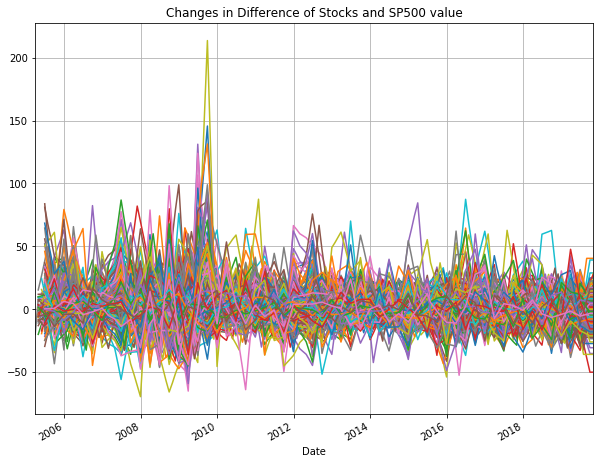

In [28]:
import matplotlib.pyplot as plt

df.pivot(index = 'Date', columns = 'Ticker',
         values = 'Diff').interpolate().plot(legend = False,
                                             kind = 'line',
                                             grid = True,
                                             figsize = (10, 8),
                                             title = "Changes in Difference of Stocks and SP500 value")

In [29]:
def status(s):
    if s > 0:
        v = "outperform"
    elif s <= 0:
        v = "underperform"
    else: v = np.NaN
    return v

df['Status'] = df['Diff'].apply(status)
df.head()

,Date,Unix,Ticker,DERatio,Price,sp500_val,stock_change,sp500_change,Diff,Status
1066,2005-03-31,1.112245e+09,ALXN,0.00,5.150000,1191.140015,-20.981969,-0.880401,-20.101568,underperform
7279,2005-04-29,1.114747e+09,CPRT,0.00,5.825000,1171.349976,-2.835698,-2.527211,-0.308487,underperform
6282,2005-04-29,1.114747e+09,CSCO,0.00,14.052094,1171.349976,-0.770919,-2.527211,1.756292,outperform
2861,2005-04-29,1.114747e+09,AMAT,0.05,11.948810,1171.349976,-6.519126,-2.527211,-3.991915,underperform
16314,2005-04-29,1.114747e+09,LOW,0.26,21.143808,1171.349976,-9.045749,-2.527211,-6.518538,underperform


In [30]:
df.iloc[[df['Diff'].idxmax(),]]

,Date,Unix,Ticker,DERatio,Price,sp500_val,stock_change,sp500_change,Diff,Status
13502,2006-06-30,1.151640e+09,IDXX,0.02,18.674999,1265.47998,-7.970927,-2.317254,-5.653673,underperform


In [31]:
df[(df.Diff == df.Diff.max())]

,Date,Unix,Ticker,DERatio,Price,sp500_val,stock_change,sp500_change,Diff,Status
1936,2009-09-30,1.254283e+09,AIG,13.74,33.931797,1057.579956,233.818185,20.039036,213.779149,outperform


In [32]:
df[(df.Diff == df.Diff.min())]

,Date,Unix,Ticker,DERatio,Price,sp500_val,stock_change,sp500_change,Diff,Status
9006,2007-12-31,1.199077e+09,ETFC,3.7,27.865227,1416.180054,-78.801498,-9.078764,-69.722734,underperform


In [33]:
df.Status.value_counts()

outperform      12973
underperform    10487
Name: Status, dtype: int64

In [34]:
df.loc[df.groupby(['Ticker'], sort=False)['Date'].idxmax()]['Status'].value_counts()

outperform      209
underperform    208
Name: Status, dtype: int64

In [45]:
def last_val(df):
    return df.iloc[[-1,]]
underp_stock = df.loc[df.groupby('Ticker')[['Status']].apply(last_val).droplevel(0).index][df.Status == 'underperform']['Ticker'].tolist()
outp_stock = df.loc[df.groupby('Ticker')[['Status']].apply(last_val).droplevel(0).index][df.Status == 'outperform']['Ticker'].tolist()

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [46]:
underp = df[df['Ticker'].isin(underp_stock)]
outp = df[df['Ticker'].isin(outp_stock)]
underp.pivot(index = 'Date', columns = 'Ticker', values = 'Diff').head()

Ticker,A,ABC,ABMD,ABT,ADBE,ADI,ADM,ADP,ADS,ADSK,AES,AFL,AJG,ALB,ALGN,ALXN,AMD,AME,AMG,AMZN,ANTM,AON,AOS,APA,APD,APH,ARNC,AVY,AXP,BAC,BBY,BEN,BIIB,BK,BLK,BSX,BWA,BXP,C,CAG,CAH,CAT,CBRE,CCL,CDNS,CERN,CI,CLX,CMA,CMI,CNC,COF,COG,COP,CRM,CSCO,CSX,CTSH,CTXS,CVX,DD,DE,DHR,DIS,DISH,DLTR,DOV,DVA,DVN,DXC,EBAY,ECL,EMN,EOG,ETFC,ETN,EXPD,F,FAST,FCX,FDX,FFIV,FITB,FLIR,FLS,FMC,FTI,GD,GE,GILD,GLW,GPC,GPS,GS,HAL,HOG,HON,HP,HPQ,HSIC,HST,HUM,IDXX,IEX,IFF,ILMN,INCY,IP,IPG,IR,ISRG,IT,IVZ,JNJ,JNPR,JWN,KEY,KR,L,LB,LEN,LH,LIN,LLY,LNC,LVS,M,MAC,MAR,MCK,MDT,MET,MGM,MHK,MMC,MMM,MNST,MO,MOS,MRO,MS,MTB,MTD,MXIM,MYL,NBL,NFLX,NOV,NSC,NTRS,NUE,OMC,ORCL,OXY,PAYX,PBCT,PCAR,PFE,PFG,PGR,PKI,PNR,PRU,PVH,PWR,PXD,RCL,REGN,RHI,RJF,RL,ROL,ROP,SBUX,SCHW,SEE,SIVB,SJM,SLB,SNA,SPG,SWK,TIF,TMO,TPR,TRV,TSCO,TXT,UNH,UNM,UNP,URI,VAR,VNO,VRSN,VRTX,WAB,WBA,WCG,WLTW,WMB,WYNN,XEC,XLNX,XOM,XRAY,XRX,ZION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.101568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-29,-4.479687,NaN,NaN,NaN,NaN,-5.050063,NaN,NaN,NaN,9.723076,NaN,NaN,NaN,NaN,NaN,7.729398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.229123,1.756292,NaN,NaN,NaN,NaN,NaN,-5.199241,NaN,NaN,NaN,-13.184502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.173825,NaN,NaN,NaN,NaN,NaN,6.439868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.773157,NaN,-3.960235,NaN,-11.075650,NaN,NaN,NaN,NaN,NaN,NaN,9.839027,NaN,NaN,NaN,-0.957012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.303127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.483740,NaN,NaN,NaN,NaN,1.389854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-31,NaN,NaN,NaN,NaN,1.463426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.762991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.951661,NaN,NaN,NaN,-1.783037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.062247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.268774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.43101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.417522,NaN,-14.292602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.137269,NaN,-5.164913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.963146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-30,NaN,17.807338,-21.752942,1.302133,NaN,NaN,-3.746404,-8.419468,2.839271,NaN,-8.037259,19.631897,-3.258775,-1.389092,24.918875,7.438456,15.195189,4.090227,12.941066,-3.25842,8.092165,13.176872,-5.625037,11.

Text(0.5, 0.98, 'Underperform and Outperform of SP500 Securities from 2005-2014')

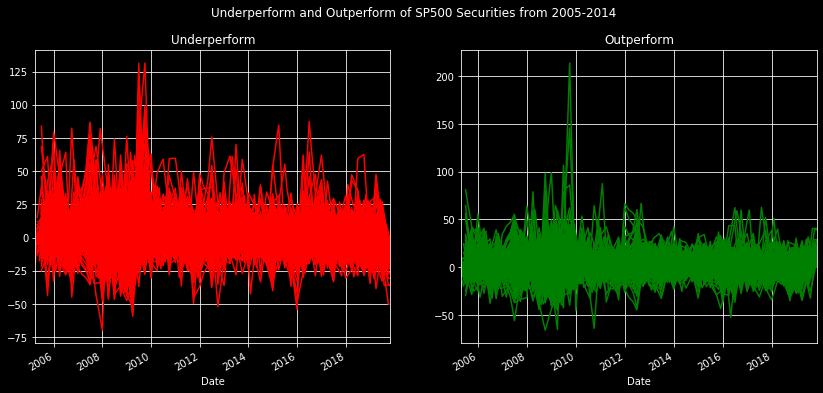

In [47]:
plt.style.use('dark_background')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 6))
underp.pivot(index = 'Date', columns = 'Ticker',
             values = 'Diff').interpolate().plot(color = 'r', kind = 'line',legend = False,
                                                 label = "underperform", ax = axes[0])
outp.pivot(index = 'Date', columns = 'Ticker',
           values = 'Diff').interpolate().plot(color = 'g', kind = 'line', legend = False,
                                               label = 'outperform', ax = axes[1])

axes[0].plot([],[], '-r', label='underperform', linewidth=2)
axes[1].plot([],[], '-g', label='outperform', linewidth=2)

axes[0].set_title('Underperform')
axes[1].set_title('Outperform')
#for tick in ax.get_xticklabels():
#    tick.set_rotation(45)
axes[0].grid(True)
axes[1].grid(True)


plt.suptitle('Underperform and Outperform of SP500 Securities from 2005-2014')

In [30]:
# import os
# url1 = "http://www.stockpup.com/data/{}_quarterly_financial_data.csv"
# not_found_stats = []
# def get_stat():
#     with open("/Users/Mavis/Desktop/Python/Sentdex/Finance/sp500tickers.pickle", "rb") as f:
#         sp500_tickers = pickle.load(f)
        
#     if not os.path.exists('stock_up'):
#         os.makedirs('stock_up')
        
#     for ticker in sp500_tickers:
#         if not os.path.exists('stock_up/{}.csv'.format(ticker)):
#             try:
#                 df = pd.read_csv(url1.format(ticker), sep=',')
                
#                 df = df[['Quarter end', 'Cash from operating activities', 'Cash from investing activities', 
#                          'Cash from financing activities']]
#                 df.columns = ['Date', 'Operating_cash', 'Investing_cash', 'Financing_cash']
#                 df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
#                 df = df[::-1]
#                 df = df[(df['Date'] >= '2005-03-31')]
#                 #print(df.head())
#                 df.to_csv('stock_up/{}.csv'.format(ticker))
#             except:
#                 not_found_stats.append(ticker)
#         else:
#             print('Already had {}'.format(ticker))
# get_stat()

In [29]:
# def combine_data(name):
#     with open("~/Desktop/Python/Sentdex/Finance/sp500tickers.pickle", 'rb') as f:
#         tickers = pickle.load(f)
        
#     main_df = pd.DataFrame()
#     for count, ticker in enumerate(tickers):
#         if ticker in not_found_stats:
#             pass
#         else:
#             df = pd.read_csv('stockpup/{}.csv'.format(ticker))
#             df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
#             df.drop('Unnamed: 0', axis = 1, inplace = True)
#             df = df[(df['Date'] >= '2005-03-31')]
#             df.set_index('Date', inplace=True)
        
#             df.rename(columns={name: ticker}, inplace=True)
#             df.drop(df.columns.difference([ticker]), axis = 1, inplace=True)
        
#             if main_df.empty:
#                 main_df = df
#             else:
#                 main_df = main_df.join(df, how='outer')
            
#         #if count%10 == 0:
#         #    print(count)
            
#     #print(main_df.head())
#     main_df.to_csv('joined_{}.csv'.format(name))
    
# op_cash = combine_data('Operating_cash')
# f_cash = combine_data('Financing_cash')
# in_cash = combine_data('Investing_cash')

In [48]:
op_cash = pd.read_csv('joined_Operating_cash.csv')
op_cash = op_cash.replace('None', np.nan)
op_cash = op_cash.interpolate().bfill().ffill()
op_cash.Date = pd.to_datetime(op_cash.Date, format="%Y-%m-%d")

f_cash = pd.read_csv('joined_Financing_cash.csv')
f_cash = f_cash.replace('None', np.nan)
f_cash = f_cash.interpolate().bfill().ffill()
f_cash.Date = pd.to_datetime(f_cash.Date, format="%Y-%m-%d")

in_cash = pd.read_csv('joined_Investing_cash.csv')
in_cash = in_cash.replace('None', np.nan)
in_cash = in_cash.interpolate().bfill().ffill()
in_cash.Date = pd.to_datetime(in_cash.Date, format="%Y-%m-%d")

In [29]:
# headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:69.0) Gecko/20100101 Firefox/69.0'}

# url = "https://www.macrotrends.net/stocks/charts/{}/alphabet/{}"

# def get_stats(name):
#     with open("/Users/Mavis/Desktop/Python/Sentdex/Finance/sp500tickers.pickle", 'rb') as f:
#         tickers = pickle.load(f)
        
#     if not os.path.exists('key_stats'):
#         os.makedirs('key_stats')   
        
#     csvFile = open('/Users/Mavis/Desktop/Python/Projects/key_stats/{}.csv'.format(name), 'a')
#     csvWriter = csv.writer(csvFile)
    
#     for ticker in tickers:
#         resp = requests.get(url.format(ticker, name), headers=headers)
#         time.sleep(2)
        
#         if resp.status_code == requests.codes.ok:
#             bs = BeautifulSoup(resp.text, "lxml")
        
#             table = bs.find('table', {'class': 'table'})
#             body = table.find('tbody')
#             for row in body.findAll('tr'):
#                 try:
#                     date_stamp = datetime.strptime(row.findAll('td')[0].text, "%Y-%m-%d")
#                 except:
#                     print(row.findAll('td')[0].text)
#                     #date_stamp = datetime.strptime(row.findAll('td')[0].text, "%m/%d/%y %H:%M")
#                 unix_time = time.mktime(date_stamp.timetuple())
#                 ticker = ticker
#                 try:
#                     value = float(row.findAll('td')[-1].text)
#                 except:
#                     value = float(row.findAll('td')[-1].text.split("%")[0])/100
#                 #df = df.append({'Date': date_stamp, 'Unix': unix_time, 'Ticker': ticker, 'DERatio': value},
#                 #               ignore_index = True)
#                 csvWriter.writerow([date_stamp, unix_time, ticker, value])

# get_stats(name='pe-ratio')       
# get_stats(name='price-sales')       
# get_stats(name='price-book')       
# get_stats(name='price-fcf')       
# get_stats(name='current-ratio')       
# get_stats(name='roe')       
# get_stats(name='roa')  
# get_stats(name='roi')       
# get_stats(name='net-profit-margin')       

In [49]:
pe = pd.read_csv('pe-ratio.csv', header = None, names = ['Date', 'Unix', 'Ticker', 'PE_ratio'])
pe.Date = pd.to_datetime(pe.Date, format="%Y-%m-%d %H:%M:%S")

pb = pd.read_csv('price-book.csv', header = None, names = ['Date', 'Unix', 'Ticker', 'PB_ratio'])
pb.Date = pd.to_datetime(pb.Date, format="%Y-%m-%d %H:%M:%S")

pfcf = pd.read_csv('price-fcf.csv', header = None, names = ['Date', 'Unix', 'Ticker', 'Pfcf'])
pfcf.Date = pd.to_datetime(pfcf.Date, format="%Y-%m-%d %H:%M:%S")

ps = pd.read_csv('current-ratio.csv', header = None, names = ['Date', 'Unix', 'Ticker', 'Price_sales'])
ps.Date = pd.to_datetime(ps.Date, format="%Y-%m-%d %H:%M:%S")

cr = pd.read_csv('net-profit-margin.csv', header = None, names = ['Date', 'Unix', 'Ticker', 'current_ratio'])
cr.Date = pd.to_datetime(cr.Date, format="%Y-%m-%d %H:%M:%S")

netprofit = pd.read_csv('price-sales.csv', header = None, names = ['Date', 'Unix', 'Ticker', 'netpro_margin'])
netprofit.Date = pd.to_datetime(netprofit.Date, format="%Y-%m-%d %H:%M:%S")

roa = pd.read_csv('roa.csv', header = None, names = ['Date', 'Unix', 'Ticker', 'roa'])
roa.Date = pd.to_datetime(roa.Date, format="%Y-%m-%d %H:%M:%S")

roe = pd.read_csv('roe.csv', header = None, names = ['Date', 'Unix', 'Ticker', 'roe'])
roe.Date = pd.to_datetime(roe.Date, format="%Y-%m-%d %H:%M:%S")

roi = pd.read_csv('roi.csv', header = None, names = ['Date', 'Unix', 'Ticker', 'roi'])
roi.Date = pd.to_datetime(roi.Date, format="%Y-%m-%d %H:%M:%S")

pe.head()

,Date,Unix,Ticker,PE_ratio
0,2019-11-22,1.574399e+09,MMM,19.90
1,2019-09-30,1.569816e+09,MMM,19.52
2,2019-06-30,1.561867e+09,MMM,20.93
3,2019-03-31,1.554005e+09,MMM,22.03
4,2018-12-31,1.546232e+09,MMM,21.26


In [24]:
# headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:69.0) Gecko/20100101 Firefox/69.0'}

# url = "https://www.macrotrends.net/stocks/charts/{}/alphabet/{}"

# #d = {'Q1 ': '01-31-', 'Q2 ': '06-30-', 'Q3 ': '09-30-', 'Q4': '12-31-'}

# def get_stats(name):
#     with open("~/Desktop/Python/Sentdex/Finance/sp500tickers.pickle", 'rb') as f:
#         tickers = pickle.load(f)
        
#     if not os.path.exists('key_stats'):
#         os.makedirs('key_stats')   
        
#     csvFile = open('~/Desktop/Python/Projects/key_stats/{}.csv'.format(name), 'a')
#     csvWriter = csv.writer(csvFile)
    
#     for ticker in tickers:
#         resp = requests.get(url.format(ticker, name), headers=headers)
#         time.sleep(2)
        
#         if resp.status_code == requests.codes.ok:
#             bs = BeautifulSoup(resp.text, "lxml")
            
#             table = bs.findAll('table', {'class': 'historical_data_table table'})[1]
#             body = table.find('tbody')
#             for row in body.findAll('tr'):
#                 date = row.findAll('td')[0].text
#                 #print(date)
#                 if date.find('Q1') != -1: date = date.replace('Q1 ', '01-31-')  
#                 elif date.find('Q2') != -1: date=date.replace('Q2 ', '06-30-')
#                 elif date.find('Q3') != -1: date=date.replace('Q3 ', '09-30-')
#                 else: date=date.replace('Q4 ', '12-31-')
#                 #print(date)
#                 date_stamp = datetime.strptime(date, "%m-%d-%Y")
#                 unix_time = time.mktime(date_stamp.timetuple())
#                 ticker = ticker
                               
#                 if row.findAll('td')[-1].text.find('$') != -1:
#                     value = float(row.findAll('td')[-1].text.split('$')[-1].replace(',', ''))
#                 else:   
#                     try:
#                         value = float(row.findAll('td')[-1].text.replace(',',''))
#                     except:
#                         value = np.nan
                
#                 csvWriter.writerow([date_stamp, unix_time, ticker, value])
# get_stats('cash-on-hand')
# get_stats('long-term-debt')
# get_stats('total-share-holder-equity')
# get_stats('shares-outstanding')
# get_stats('eps-earnings-per-share-diluted')
# get_stats('operating-income')

In [50]:
cash = pd.read_csv('cash-on-hand.csv', header = None, names = ['Date', 'Unix', 'Ticker', 'Cash'])
cash.Date = pd.to_datetime(cash.Date, format="%Y-%m-%d %H:%M:%S")
cash.Cash = cash.Cash * 1000000

debt = pd.read_csv('long-term-debt.csv', header = None, names = ['Date', 'Unix', 'Ticker', 'Debt'])
debt.Date = pd.to_datetime(debt.Date, format="%Y-%m-%d %H:%M:%S")
debt.Debt = debt.Debt * 1000000

equity = pd.read_csv('total-share-holder-equity.csv', header = None, names = ['Date', 'Unix', 'Ticker',
                                                                                        'Equity'])
equity.Date = pd.to_datetime(equity.Date, format="%Y-%m-%d %H:%M:%S")
equity.Equity = equity.Equity * 1000000

shares = pd.read_csv('shares-outstanding.csv', header = None, names = ['Date', 'Unix', 'Ticker', 'Shares'])
shares.Date = pd.to_datetime(shares.Date, format="%Y-%m-%d %H:%M:%S")
shares.Shares = shares.Shares * 1000000

eps = pd.read_csv('eps-earnings-per-share-diluted.csv', header = None, names = ['Date', 'Unix', 'Ticker',
                                                                                          'EPS'])
eps.Date = pd.to_datetime(eps.Date, format="%Y-%m-%d %H:%M:%S")

op_income = pd.read_csv('operating-income.csv', header = None, names = ['Date', 'Unix', 'Ticker',
                                                                                  'Op_income'])
op_income.Date = pd.to_datetime(op_income.Date, format="%Y-%m-%d %H:%M:%S")
op_income.Op_income = op_income.Op_income * 1000000

In [51]:
US_BUSINESS_DAY = CustomBusinessDay(calendar=USTradingCalendar())
def fixdate(dataframe):
    dataframe.Date = dataframe.Date.map(lambda x: x - US_BUSINESS_DAY if x.dayofweek > 4 else x)
    dataframe.Date = dataframe.Date.apply(lambda x: x - timedelta(days = 3) if x == datetime(2010, 5, 31) else x)
    dataframe.Unix = [time.mktime(time_stamp.timetuple()) for time_stamp in dataframe.Date]
    return dataframe

pe = fixdate(pe)
pb = fixdate(pb)
pfcf = fixdate(pfcf)
ps = fixdate(ps)
cr = fixdate(cr)
netprofit = fixdate(netprofit)
roa = fixdate(roa)
roe = fixdate(roe)
roi = fixdate(roi)
cash = fixdate(cash)
debt = fixdate(debt)
equity = fixdate(equity)
shares = fixdate(shares)
eps = fixdate(eps)
op_income = fixdate(op_income)

In [52]:
US_BUSINESS_DAY = CustomBusinessDay(calendar=USTradingCalendar())
def fixdate(dataframe):
    dataframe.Date = dataframe.Date.map(lambda x: x - US_BUSINESS_DAY if x.dayofweek > 4 else x)
    dataframe.Date = dataframe.Date.apply(lambda x: x - timedelta(days = 3) if x == datetime(2010, 5, 31) else x)
    dataframe.Unix = [time.mktime(time_stamp.timetuple()) for time_stamp in dataframe.Date]
    return dataframe

In [53]:
dataframes = [pe, pb, pfcf, ps, cr, netprofit, roa, roe, roi, cash, debt, equity, shares, eps, op_income]

def merge_df(dataframes, main_df):
    for dataframe in dataframes:
        main_df = main_df.merge(dataframe, how = 'left')
    return main_df

main_df = merge_df(dataframes, df)

In [54]:
main_df.columns

Index(['Date', 'Unix', 'Ticker', 'DERatio', 'Price', 'sp500_val',
       'stock_change', 'sp500_change', 'Diff', 'Status', 'PE_ratio',
       'PB_ratio', 'Pfcf', 'Price_sales', 'current_ratio', 'netpro_margin',
       'roa', 'roe', 'roi', 'Cash', 'Debt', 'Equity', 'Shares', 'EPS',
       'Op_income'],
      dtype='object')

In [55]:
main_df = main_df.replace([np.inf, -np.inf], np.nan)
#main_df = main_df.groupby('Ticker').apply(lambda group: group.interpolate().bfill().ffill())
main_df.to_csv('SP500_stats.csv', index=False)

In [56]:
main_df = pd.read_csv('SP500_stats.csv')
main_df.Date = pd.to_datetime(main_df.Date, format="%Y-%m-%d")
#main_df.drop('Unnamed: 0', axis = 1, inplace = True)
main_df.head(10)

,Date,Unix,Ticker,DERatio,Price,sp500_val,stock_change,sp500_change,Diff,Status,PE_ratio,PB_ratio,Pfcf,Price_sales,current_ratio,netpro_margin,roa,roe,roi,Cash,Debt,Equity,Shares,EPS,Op_income
0,2005-03-31,1.112245e+09,ALXN,0.00,5.150000,1191.140015,-20.981969,-0.880401,-20.101568,underperform,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-04-29,1.114747e+09,CPRT,0.00,5.825000,1171.349976,-2.835698,-2.527211,-0.308487,underperform,NaN,NaN,NaN,4.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-04-29,1.114747e+09,CSCO,0.00,14.052094,1171.349976,-0.770919,-2.527211,1.756292,outperform,NaN,NaN,NaN,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-04-29,1.114747e+09,AMAT,0.05,11.948810,1171.349976,-6.519126,-2.527211,-3.991915,underperform,NaN,NaN,NaN,4.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-04-29,1.114747e+09,LOW,0.26,21.143808,1171.349976,-9.045749,-2.527211,-6.518538,underperform,NaN,NaN,NaN,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005-04-29,1.114747e+09,TTWO,0.00,24.958458,1171.349976,-1.083227,-2.527211,1.443984,outperform,NaN,NaN,NaN,3.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005-04-29,1.114747e+09,TIF,0.23,23.434473,1171.349976,-1.137357,-2.527211,1.389854,outperform,NaN,NaN,NaN,4.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2005-04-29,1.114747e+09,DLTR,0.00,7.796667,1171.349976,-15.711712,-2.527211,-13.184502,underperform,NaN,NaN,NaN,2.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2005-04-29,1.114747e+09,INTU,0.01,19.007124,1171.349976,6.430967,-2.527211,8.958178,outperform,NaN,NaN,NaN,1.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2005-04-29,1.114747e+09,WMT,0.46,35.356052,1171.349976,-8.233319,-2.527211,-5.706108,underperform,NaN,NaN,NaN,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# main_df.dropna(inplace=True)
main_df.shape

(24531, 25)

In [58]:
main_df.isnull().sum()

Date                0
Unix                0
Ticker              0
DERatio             0
Price               0
sp500_val           0
stock_change        0
sp500_change        0
Diff                0
Status              0
PE_ratio         2986
PB_ratio         1755
Pfcf             3002
Price_sales         0
current_ratio    1248
netpro_margin    2986
roa              1180
roe              1180
roi              2388
Cash             7549
Debt             8556
Equity           7547
Shares           7418
EPS              7115
Op_income        7420
dtype: int64

In [59]:
op_cash = fixdate(op_cash)
f_cash = fixdate(f_cash)
in_cash = fixdate(in_cash)

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [60]:
op_cash = op_cash.melt(id_vars = 'Date')
op_cash.columns = ['Date', 'Ticker', 'Operating_cash']
f_cash = f_cash.melt(id_vars = 'Date')
f_cash.columns = ['Date', 'Ticker', 'Financing_cash']
in_cash = in_cash.melt(id_vars = 'Date')
in_cash.columns = ['Date', 'Ticker', 'Investing_cash']

In [61]:
emptydf = pd.DataFrame({'a': list(range(1, 5475))})
emptydf['Date'] = pd.date_range(start='2005-01-31', periods=5474, freq = "D")
emptydf.drop('a', axis = 1, inplace = True)
emptydf.head()

,Date
0,2005-01-31
1,2005-02-01
2,2005-02-02
3,2005-02-03
4,2005-02-04


In [62]:
combine_cash = emptydf.merge(op_cash, how = 'left')\
.merge(f_cash, how = 'left').merge(in_cash, how = 'left')#.groupby('Ticker').apply(lambda group: group.bfill().ffill())

combine_cash.head()

,Date,Ticker,Operating_cash,Financing_cash,Investing_cash
0,2005-01-31,NaN,NaN,NaN,NaN
1,2005-02-01,NaN,NaN,NaN,NaN
2,2005-02-02,NaN,NaN,NaN,NaN
3,2005-02-03,NaN,NaN,NaN,NaN
4,2005-02-04,NaN,NaN,NaN,NaN


In [63]:
main_df = main_df.merge(combine_cash, how = 'left').drop_duplicates(['Date', 'Ticker'])
main_df.isnull().sum()

Date                 0
Unix                 0
Ticker               0
DERatio              0
Price                0
sp500_val            0
stock_change         0
sp500_change         0
Diff                 0
Status               0
PE_ratio          2797
PB_ratio          1566
Pfcf              2813
Price_sales          0
current_ratio      996
netpro_margin     2797
roa                991
roe                991
roi               2199
Cash              7144
Debt              8151
Equity            7142
Shares            7164
EPS               7115
Op_income         7166
Operating_cash    2526
Financing_cash    2526
Investing_cash    2526
dtype: int64

In [64]:
main_df['Operating_cash'] = pd.to_numeric(main_df['Operating_cash'],errors = 'coerce')
main_df['Financing_cash'] = pd.to_numeric(main_df['Financing_cash'],errors = 'coerce')
main_df['Investing_cash'] = pd.to_numeric(main_df['Investing_cash'],errors = 'coerce')

# PART 2: APPLYING MACHINE LEARNING

In [65]:
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
#from sklearn.utils import resample
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [66]:
main_df['Status'] = [0 if i == "outperform" else 1 for i in main_df['Status'].values]
# main_df['Status'] = np.where(main_df['Status']=="outperform", 0, 1)

In [67]:
FEATURES = list(main_df.columns.difference(['Date', 'Unix', 'Ticker', 'Price',
                                        'sp500_val', 'stock_change', 'sp500_change', 'Diff', 'Status']).values)
X = main_df[FEATURES]
y = main_df['Status']

Xrest, Xtest, yrest, yvalid = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
Xtest

,Cash,DERatio,Debt,EPS,Equity,Financing_cash,Investing_cash,Op_income,Operating_cash,PB_ratio,PE_ratio,Pfcf,Price_sales,Shares,current_ratio,netpro_margin,roa,roe,roi
220911,4.266000e+09,0.13,2.486900e+10,0.93,1.891980e+11,-4.991944e+09,-2.572944e+09,5.583000e+09,7.502333e+09,1.73,25.13,10.21,0.85,4.271000e+09,0.0589,1.48,0.0381,0.0710,0.0778
65239,2.950000e+08,3.13,1.356100e+10,1.22,4.331000e+09,3.395090e+08,-7.739218e+08,4.690000e+08,4.139057e+08,5.25,26.49,0.00,0.54,2.950000e+08,0.1180,3.12,0.0394,0.2264,0.1077
196520,9.850000e+08,0.26,1.261000e+10,3.48,4.827500e+10,-1.260000e+08,-7.460000e+08,2.154000e+09,8.750000e+08,1.22,14.38,4.81,0.25,4.660000e+08,0.1314,1.87,0.0259,0.0872,0.1007
69938,7.110000e+08,0.00,NaN,0.33,1.652000e+09,-5.193273e+07,-1.515371e+08,6.000000e+07,8.765027e+07,3.54,28.20,7.23,1.67,1.870000e+08,0.1561,4.55,0.0931,0.1299,0.5355
94675,6.440000e+08,0.66,9.050000e+08,0.20,1.316000e+09,-3.270000e+07,-1.350000e+07,2.900000e+07,1.196000e+08,4.00,30.66,5.14,2.27,1.420000e+08,0.0427,1.30,0.0422,0.1225,0.0973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78101,2.481000e+09,0.24,4.203000e+09,0.76,1.723400e+10,-1.160000e+08,-1.556059e+09,1.742000e+09,1.617647e+09,5.12,16.07,8.98,1.31,1.658000e+09,0.1430,2.31,0.1754,0.3491,0.3735
80604,1.174000e+09,1.00,3.166000e+09,-1.11,3.183000e+09,-8.582200e+07,-8.501000e+06,-2.980000e+08,2.802740e+08,1.04,0.00,1.24,0.82,2.540000e+08,-0.2672,0.43,-0.2230,-0.5505,-0.2278
11711,8.800000e+07,0.38,2.520000e+08,-0.02,6.590000e+08,-3.430000e+07,-1.160000e+07,3.900000e+07,3.900000e+07,NaN,NaN,NaN,2.10,2.390000e+08,NaN,NaN,NaN,NaN,NaN
1317,4.320000e+08,0.54,1.810000e+08,0.36,3.350000e+08,NaN,NaN,2.300000e+07,NaN,NaN,NaN,NaN,2.05,3.900000e+07,NaN,NaN,NaN,NaN,NaN


In [68]:
# for f in FEATURES:
#     main_df.loc[main_df[f].isnull(), f] = main_df.groupby('Ticker')[f].transform('mean')
#     #main_df2[f] = main_df2.groupby('Ticker')[f].transform(lambda x: x.fillna(x.mean()))
#     #main_df2[f] = main_df2[f].fillna(main_df2.groupby('Ticker')[f].transform('mean'))

In [69]:
main_df.isna().sum()

Date                 0
Unix                 0
Ticker               0
DERatio              0
Price                0
sp500_val            0
stock_change         0
sp500_change         0
Diff                 0
Status               0
PE_ratio          2797
PB_ratio          1566
Pfcf              2813
Price_sales          0
current_ratio      996
netpro_margin     2797
roa                991
roe                991
roi               2199
Cash              7144
Debt              8151
Equity            7142
Shares            7164
EPS               7115
Op_income         7166
Operating_cash    2526
Financing_cash    2526
Investing_cash    2526
dtype: int64

In [70]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [71]:
main_df.dropna(inplace=True)
main_df['Status'].value_counts()

0    6463
1    5545
Name: Status, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: outperform || 1: underperform)')

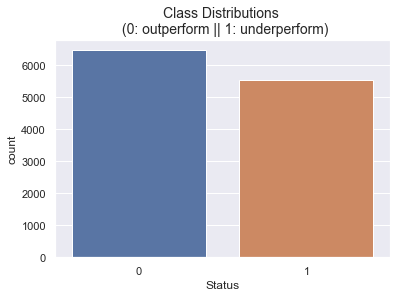

In [72]:
sns.countplot('Status', data=main_df)
plt.title('Class Distributions \n (0: outperform || 1: underperform)', fontsize=14)

In [73]:
# class_0 = main_df[main_df['Status'] == 0]
# class_1 = main_df[main_df['Status'] == 1]
# for col in FEATURES:
#     plt.figure(figsize=(16,6))
#     sns.distplot(class_1[col],color="red", kde=True,bins=120, label='target = underperform')
#     sns.distplot(class_0[col],color="blue", kde=True,bins=120, label='target = outperform')
#     plt.legend(); plt.show()


In [74]:
# main_df.to_csv("sp500_stats.csv", index=False)

In [75]:
list(FEATURES) + ["Status"]

['Cash',
 'DERatio',
 'Debt',
 'EPS',
 'Equity',
 'Financing_cash',
 'Investing_cash',
 'Op_income',
 'Operating_cash',
 'PB_ratio',
 'PE_ratio',
 'Pfcf',
 'Price_sales',
 'Shares',
 'current_ratio',
 'netpro_margin',
 'roa',
 'roe',
 'roi',
 'Status']

Text(0.5, 1, 'Features Correlation Heatmap')

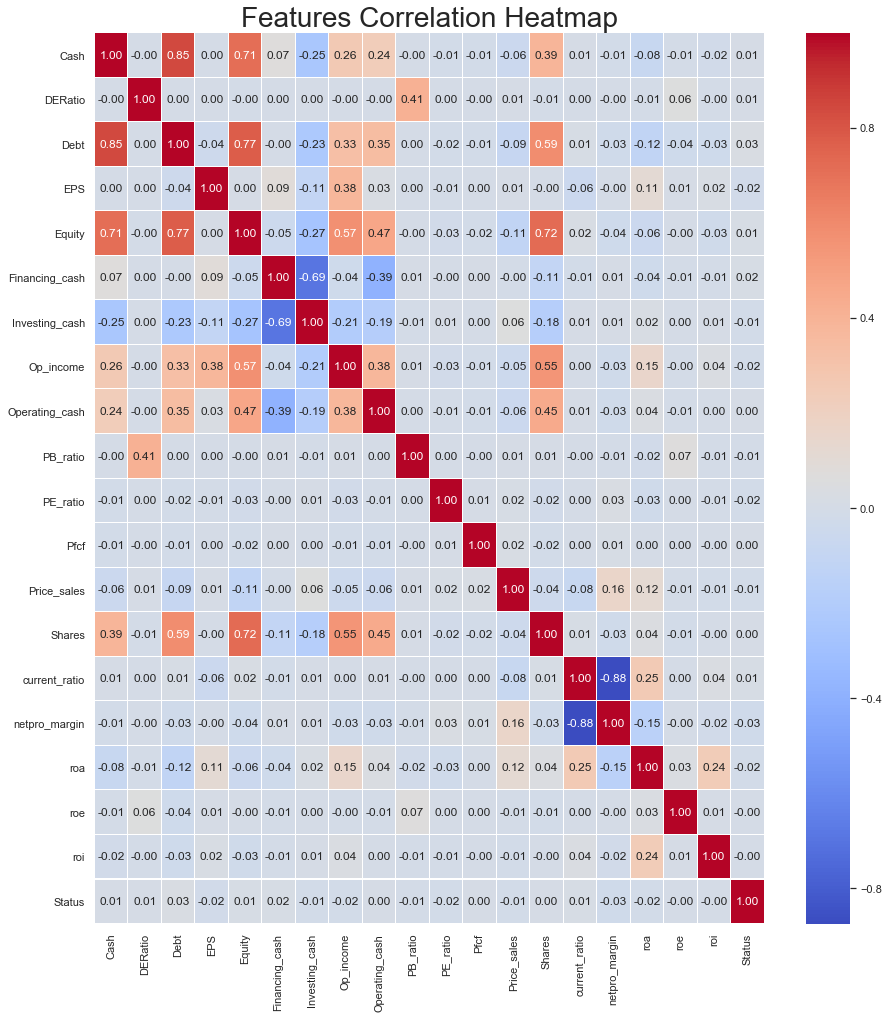

In [76]:
fig, ax = plt.subplots(figsize=(15,15))
hm = sns.heatmap(round(main_df[FEATURES + ["Status"]].corr(), 3), annot=True, cmap="coolwarm", fmt='.2f', linewidths=.05)
fig.subplots_adjust(top=0.95)
plt.title("Features Correlation Heatmap", fontsize=28)

In [98]:
FEATURES = main_df.columns.difference(['Date', 'Unix', 'Ticker', 'Price',
                                        'sp500_val', 'stock_change', 'sp500_change', 'Diff', 'Status']).values

def choosing_features(features):
    data_df = pd.read_csv('sp500_stats.csv')
    #data_df = data_df[:10000]
    X = data_df[features].values#.reshape(len(data_df), 19)
    y = data_df['Status'].replace('underperform', 1).replace('outperform', 0).values
    
    X = preprocessing.normalize(X)
    
    return X, y

def Analysis(features):
    X, y = choosing_features(features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
    #X = pd.concat([pd.DataFrame(X_train, columns=features), pd.DataFrame(y_train, columns=['Status'])], axis=1)
    #print(X.head())
    #underpf = X[X.Status==0]
    #outpf = X[X.Status==1]
    #resample = pd.concat([outpf, underpf.sample(X.Status.value_counts()[0], replace=True)], axis=0)
    #X_train = resample[features].values.reshape(len(X), 19)
    #y_train = resample['Status'].values
    
    clf = svm.SVC(kernel = 'rbf', C = 20)
    clf.fit(X_train, y_train)
    
    #correct_count = 0
    #for x in range(1, int(0.25*1000)+1):
    #    if clf.predict(X[-x]) == y[-x]:
    #        correct_count += 1
    prediction = clf.predict(X_test)
    correct = 0
    for i in range(len(prediction)):
        if prediction[i] == y_test[i]:
            correct += 1
    print(clf.score(X_test, y_test))
    print(clf.score(X_train, y_train))
    print('Accuracy:', correct/len(y_test))
    print(metrics.confusion_matrix(y_test, prediction))
    #print(metrics.confusion_matrix(y_train, pred))
Analysis(features=FEATURES)


0.5494725354674427
0.555387133935609
Accuracy: 0.5494725354674427
[[3004   14]
 [2463   17]]


This algorithms does not give any correct result on the valid data!!!

In [61]:
from sklearn.ensemble import RandomForestClassifier

def choosing_features(features):
    data_df = pd.read_csv('SP500_stats2.csv')
    data_df = data_df.reindex(np.random.permutation(data_df.index))
    #data_df = data_df[:10000]
    X = data_df[features]#.values.reshape(len(data_df), 19)
    y = data_df['Status'].replace('underperform', 1).replace('outperform', 0)#.values
    
    #X = preprocessing.normalize(X)
    Z = data_df[['stock_change', 'sp500_change']]#.values
    
    return X, y, Z

def Analysis(features):
    invest_amount = 10000
    total_invests = 0
    if_market = 0
    if_strat = 0
    
    
    X, y, Z = choosing_features(features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)
    Z = Z.iloc[y_test.index,:].values
    y_test = y_test.values
    clf = RandomForestClassifier(n_estimators=1000, max_depth=80, random_state = 2)
    clf.fit(X_train, y_train)
            
    prediction = clf.predict(X_test)
    correct = 0
    for i in range(len(prediction)):
        if prediction[i] == y_test[i]:
            correct += 1
            
        if prediction[i] == 1:
            
            invest_return = invest_amount + (invest_amount * Z[i][0]/100)
            market_return = invest_amount + (invest_amount * Z[i][1]/100)
            total_invests += 1
            if_market += market_return
            if_strat += invest_return
            
    #print(clf.score(X_test, y_test))
    print(clf.score(X_test, y_test))
    print(clf.score(X_train, y_train))
    print('Accuracy:', correct/len(y_test))
    print(metrics.confusion_matrix(y_test, prediction))
    #print(metrics.confusion_matrix(y_train, pred))
    print('Total trade:', total_invests)
    print('Ending with strategy:', if_strat)
    print('Ending with market:', if_market)
    
    compared = ((if_strat - if_market)/if_strat)*100
    do_nothing = total_invests * invest_amount
    
    avg_market = ((if_market - do_nothing)/do_nothing)*100
    avg_return = ((if_strat - do_nothing)/do_nothing)*100
    
    print('Compared to market, we earn:', str(compared)+"% more")
    print("Average investment return", str(avg_return)+"%")
    print("Average market return", str(avg_market)+"%")

Analysis(features=FEATURES)

0.5452876376988984
1.0
Accuracy: 0.5452876376988984
[[1157  596]
 [ 890  625]]
Total trade: 1221
Ending with strategy: 12617856.19328547
Ending with market: 12411369.719103146
Compared to market, we earn: 1.6364624150036298% more
Average investment return 3.3403455633535692%
Average market return 1.6492196486744173%


In [ ]:
def roc_graph(clf, validx, validy):
  
    fpr, tpr, _ = roc_curve(validy, clf.predict_proba(validx)[:,1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=[5, 5])
    plt.plot(fpr, tpr, color='darkorange',
            lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.show()

def model_cv(clf, X, y, over_resample=None, under_resample=None, weights=None):
    k=10
  
    X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size=0.10, random_state=2)
  
    clf = clf

    a_score = np.zeros(shape=(k,))
    auc_sc = np.zeros(shape=(k,))
  

    kf = StratifiedKFold(n_splits=k, shuffle=True)
    for i, (train_index , valid_index) in enumerate(kf.split(X_rest, y_rest)):
        X_train , X_valid = X_rest[train_index,:],X_rest[valid_index,:]
        y_train , y_valid = y_rest[train_index] , y_rest[valid_index]

    if over_resample:
        X_train,y_train = RandomOverSampler(sampling_strategy=1).fit_resample(X_train,y_train)
    if under_resample:  
        X_train,y_train = RandomUnderSampler(sampling_strategy={1:5000,0:5000}).fit_resample(X_train,y_train)
    if weights:
      
    
    y_pred = clf.fit(X_train,y_train).predict(X_test)
    precision, recall, thresholds = precision_recall_curve(y_, y_pred)
    r_score[i] = recall_score(y_valid, y_pred)
    p_score[i] = precision_score(y_valid, y_pred)
    a_score[i] = accuracy_score(y_valid, y_pred)
    f_1[i] = f1_score(y_valid, y_pred)
    auc_sc[i] = roc_auc_score(y_valid, y_pred)
    avg_pr[i] = average_precision_score(y_valid, clf.predict_proba(X_valid)[:,1])
    rp_curve[i] = auc(recall, precision)

    print("\nFOLD %d:\n" %(i+1))
    # Confusion matrix
    conf_matrix = confusion_matrix(y_valid,y_pred)
    sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
    plt.show()
    #roc_graph(clf, X_valid, y_valid)
    print()

    print("\nK FOLD AVERAGE:\n")
    print("Accuracy Score: {}".format(a_score.sum()/k))
    print("Precision Score: {}".format(p_score.sum()/k))
    print("Recall Score: {}".format(r_score.sum()/k))
    print("F_1 Score: {}".format(f_1.sum()/k))
    print("AUC Score: {}".format(auc_sc.sum()/k))
    print("Average Precision Score: {}".format(avg_pr.sum()/k))
    print("Precision Recall Curve: {}".format(rp_curve.sum()/k))

# RANDOM FOREST WITH RESAMPLED TRAIN DATA

# Since we do not want to buy underperforming stocks, a high precision score is desirable

In [74]:
from sklearn.ensemble import RandomForestClassifier

def choosing_features(features):
    data_df = pd.read_csv('SP500_stats2.csv')
    #data_df = data_df[:10000]
    X = data_df[features].values.reshape(len(data_df), 19)
    y = data_df['Status'].replace('underperform', 0).replace('outperform', 1).values
    
    X = preprocessing.normalize(X)
    Z = data_df[['stock_change', 'sp500_change']].values
    return X, y,Z

def Analysis(features):
    X, y, Z= choosing_features(features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
    X = pd.concat([pd.DataFrame(X_train, columns=features), pd.DataFrame(y_train, columns=['Status'])], axis=1)
    #print(X.head())
    underpf = X[X.Status==0]
    outpf = X[X.Status==1]
    resample = pd.concat([outpf, underpf.sample(X.Status.value_counts()[1], replace=True)], axis=0)
    X_train = resample[features].values.reshape(len(resample), 19)
    y_train = resample['Status'].values
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
            
    prediction = clf.predict(X_test)
    
    invest_amount = 10000
    total_invests = 0
    if_market = 0
    if_strat = 0
    correct = 0
    for i in range(len(prediction)):
        if prediction[i] == y_test[i]:
            correct += 1
            
        if prediction[i] == 1:
            invest_return = invest_amount + (invest_amount * Z[i][0]/100)
            market_return = invest_amount + (invest_amount * Z[i][1]/100)
            total_invests += 1
            if_market += market_return
            if_strat += invest_return
            
    #print(clf.score(X_test, y_test))
    print(clf.score(X_test, y_test))
    print(clf.score(X_train, y_train))
    print('Accuracy:', correct/len(y_test))
    print('Precision score on train', precision_score(y_train, clf.predict(X_train)))
    print('Precision score on test', precision_score(y_test, prediction))
    print(metrics.confusion_matrix(y_test, prediction))
    #print(metrics.confusion_matrix(y_train, pred))
    print('Total trade:', total_invests)
    print('Ending with strategy:', if_strat)
    print('Ending with market:', if_market)
    
    compared = ((if_strat - if_market)/if_strat)*100
    do_nothing = total_invests * invest_amount
    
    avg_market = ((if_market - do_nothing)/do_nothing)*100
    avg_return = ((if_strat - do_nothing)/do_nothing)*100
    
    print('Compared to market, we earn:', str(compared)+"% more")
    print("Average investment return", str(avg_return)+"%")
    print("Average market return", str(avg_market)+"%")

Analysis(features=FEATURES)

0.792115317818687
0.9996331322354476
Accuracy: 0.792115317818687
Precision score on train 1.0
Precision score on test 0.8087787918296393
[[ 839  880]
 [ 317 3722]]
Total trade: 4602
Ending with strategy: 142729779.97819495
Ending with market: 66046738.82048663
Compared to market, we earn: 53.72602772135101% more
Average investment return 210.147283742275%
Average market return 43.51746810188315%


In [105]:
from sklearn.linear_model import SGDClassifier

def choosing_features(features):
    data_df = pd.read_csv('SP500_stats2.csv')
    data_df = data_df.reindex(np.random.permutation(data_df.index))
    #data_df = data_df[:10000]
    X = data_df[features].values.reshape(len(data_df), 19)
    y = data_df['Status'].replace('underperform', 0).replace('outperform', 1).values
    
    X = preprocessing.normalize(X)
    Z = data_df[['stock_change', 'sp500_change']].values
    return X, y, Z

def Analysis(features):
    invest_amount = 10000
    total_invests = 0
    if_market = 0
    if_strat = 0
    
    
    X, y, Z = choosing_features(features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
    clf = SGDClassifier(penalty="l2", loss = "squared_hinge", learning_rate="optimal")
    clf.fit(X_train, y_train)
            
    prediction = clf.predict(X_test)
    correct = 0
    for i in range(len(prediction)):
        if prediction[i] == y_test[i]:
            correct += 1
            
        if prediction[i] == 1:
            invest_return = invest_amount + (invest_amount * Z[i][0]/100)
            market_return = invest_amount + (invest_amount * Z[i][1]/100)
            total_invests += 1
            if_market += market_return
            if_strat += invest_return
            
    #print(clf.score(X_test, y_test))
    print(clf.score(X_test, y_test))
    print(clf.score(X_train, y_train))
    print('Accuracy:', correct/len(y_test))
    print(metrics.confusion_matrix(y_test, prediction))
    #print(metrics.confusion_matrix(y_train, pred))
    print('Total trade:', total_invests)
    print('Ending with strategy:', if_strat)
    print('Ending with market:', if_market)
    
    compared = ((if_strat - if_market)/if_strat)*100
    do_nothing = total_invests * invest_amount
    
    avg_market = ((if_market - do_nothing)/do_nothing)*100
    avg_return = ((if_strat - do_nothing)/do_nothing)*100
    
    print('Compared to market, we earn:', str(compared)+"% more")
    print("Average investment return", str(avg_return)+"%")
    print("Average market return", str(avg_market)+"%")

Analysis(features=FEATURES)

0.5795412731509874
0.5955350206484851
Accuracy: 0.5795412731509874
[[2472 1581]
 [1847 2253]]
Total trade: 3834
Ending with strategy: 93647422.21194033
Ending with market: 55255217.088055104
Compared to market, we earn: 40.996542368242686% more
Average investment return 144.25514400610416%
Average market return 44.11898040702948%


# SGD WITH RESAMPLED TRAIN DATA

In [71]:
from sklearn.linear_model import SGDClassifier

def choosing_features(features):
    data_df = pd.read_csv('SP500_stats2.csv')
    #data_df = data_df[:10000]
    X = data_df[features].values.reshape(len(data_df), 19)
    y = data_df['Status'].replace('underperform', 0).replace('outperform', 1).values
    
    X = preprocessing.normalize(X)
    Z = data_df[['stock_change', 'sp500_change']].values
    return X, y,Z

def Analysis(features):
    X, y, Z= choosing_features(features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
    X = pd.concat([pd.DataFrame(X_train, columns=features), pd.DataFrame(y_train, columns=['Status'])], axis=1)
    #print(X.head())
    underpf = X[X.Status==0]
    outpf = X[X.Status==1]
    #print(X.Status.value_counts())
    resample = pd.concat([outpf, underpf.sample(X.Status.value_counts()[1], replace=True)], axis=0)
    X_train = resample[features].values.reshape(len(resample), 19)
    y_train = resample['Status'].values
    clf = SGDClassifier(penalty="l2", loss = "squared_hinge", learning_rate="optimal")
    clf.fit(X_train, y_train)
            
    prediction = clf.predict(X_test)
    
    invest_amount = 10000
    total_invests = 0
    if_market = 0
    if_strat = 0
    correct = 0
    for i in range(len(prediction)):
        if prediction[i] == y_test[i]:
            correct += 1
            
        if prediction[i] == 1:
            invest_return = invest_amount + (invest_amount * Z[i][0]/100)
            market_return = invest_amount + (invest_amount * Z[i][1]/100)
            total_invests += 1
            if_market += market_return
            if_strat += invest_return
            
    #print(clf.score(X_test, y_test))
    print(clf.score(X_test, y_test))
    print(clf.score(X_train, y_train))
    print('Accuracy:', correct/len(y_test))
    print('Precision score on train', precision_score(y_train, clf.predict(X_train)))
    print('Precision score on test', precision_score(y_test, prediction))
    print(metrics.confusion_matrix(y_test, prediction))
    #print(metrics.confusion_matrix(y_train, pred))
    print('Total trade:', total_invests)
    print('Ending with strategy:', if_strat)
    print('Ending with market:', if_market)
    
    compared = ((if_strat - if_market)/if_strat)*100
    do_nothing = total_invests * invest_amount
    
    avg_market = ((if_market - do_nothing)/do_nothing)*100
    avg_return = ((if_strat - do_nothing)/do_nothing)*100
    
    print('Compared to market, we earn:', str(compared)+"% more")
    print("Average investment return", str(avg_return)+"%")
    print("Average market return", str(avg_market)+"%")

Analysis(features=FEATURES)

0.6563042723167767
0.5802217511821295
Accuracy: 0.6563042723167767
Precision score on train 0.5579710144927537
Precision score on test 0.7451213707758211
[[ 648 1071]
 [ 908 3131]]
Total trade: 4202
Ending with strategy: 132251553.9904643
Ending with market: 60173539.55351295
Compared to market, we earn: 54.500693762848606% more
Average investment return 214.73477865412733%
Average market return 43.202140774661956%


In [70]:
from sklearn.neighbors import KNeighborsClassifier 

def choosing_features(features):
    data_df = pd.read_csv('SP500_stats2.csv')
    data_df = data_df.reindex(np.random.permutation(data_df.index))
    #data_df = data_df[:10000]
    X = data_df[features].values.reshape(len(data_df), 19)
    y = data_df['Status'].replace('underperform', 0).replace('outperform', 1).values
    
    X = preprocessing.normalize(X)
    Z = data_df[['stock_change', 'sp500_change']].values
    return X, y, Z

def Analysis(features):
    invest_amount = 10000
    total_invests = 0
    if_market = 0
    if_strat = 0
    
    
    X, y, Z = choosing_features(features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
    clf = KNeighborsClassifier(n_neighbors = 3)
    clf.fit(X_train, y_train)
            
    prediction = clf.predict(X_test)
    correct = 0
    for i in range(len(prediction)):
        if prediction[i] == y_test[i]:
            correct += 1
            
        if prediction[i] == 1:
            invest_return = invest_amount + (invest_amount * Z[i][0]/100)
            market_return = invest_amount + (invest_amount * Z[i][1]/100)
            total_invests += 1
            if_market += market_return
            if_strat += invest_return
            
    #print(clf.score(X_test, y_test))
    print(clf.score(X_test, y_test))
    print(clf.score(X_train, y_train))
    print('Accuracy:', correct/len(y_test))
    print('Precision score on train', precision_score(y_train, clf.predict(X_train)))
    print('Precision score on test', precision_score(y_test, prediction))
    print(metrics.confusion_matrix(y_test, prediction))
    #print(metrics.confusion_matrix(y_train, pred))
    print('Total trade:', total_invests)
    print('Ending with strategy:', if_strat)
    print('Ending with market:', if_market)
    
    compared = ((if_strat - if_market)/if_strat)*100
    do_nothing = total_invests * invest_amount
    
    avg_market = ((if_market - do_nothing)/do_nothing)*100
    avg_return = ((if_strat - do_nothing)/do_nothing)*100
    
    print('Compared to market, we earn:', str(compared)+"% more")
    print("Average investment return", str(avg_return)+"%")
    print("Average market return", str(avg_market)+"%")

Analysis(features=FEATURES)

0.7504341785342132
0.8637258307282621
Accuracy: 0.7504341785342132
Precision score on train 0.8790551422655112
Precision score on test 0.7981401678385122
[[ 802  890]
 [ 547 3519]]
Total trade: 4409
Ending with strategy: 124015152.31847991
Ending with market: 63308153.35131363
Compared to market, we earn: 48.951275575799244% more
Average investment return 181.2772790167383%
Average market return 43.588463033145%


In [69]:
from sklearn.neighbors import KNeighborsClassifier 

def choosing_features(features):
    data_df = pd.read_csv('SP500_stats2.csv')
    #data_df = data_df[:10000]
    X = data_df[features].values.reshape(len(data_df), 19)
    y = data_df['Status'].replace('underperform', 0).replace('outperform', 1).values
    
    X = preprocessing.normalize(X)
    Z = data_df[['stock_change', 'sp500_change']].values
    return X, y,Z

def Analysis(features):
    X, y, Z= choosing_features(features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
    X = pd.concat([pd.DataFrame(X_train, columns=features), pd.DataFrame(y_train, columns=['Status'])], axis=1)
    #print(X.head())
    underpf = X[X.Status==0]
    outpf = X[X.Status==1]
    #print(X.Status.value_counts())
    resample = pd.concat([outpf, underpf.sample(X.Status.value_counts()[1], replace=True)], axis=0)
    X_train = resample[features].values.reshape(len(resample), 19)
    y_train = resample['Status'].values
    clf = SGDClassifier(penalty="l2", loss = "squared_hinge", learning_rate="optimal")
    clf.fit(X_train, y_train)
            
    prediction = clf.predict(X_test)
    
    invest_amount = 10000
    total_invests = 0
    if_market = 0
    if_strat = 0
    correct = 0
    for i in range(len(prediction)):
        if prediction[i] == y_test[i]:
            correct += 1
            
        if prediction[i] == 1:
            invest_return = invest_amount + (invest_amount * Z[i][0]/100)
            market_return = invest_amount + (invest_amount * Z[i][1]/100)
            total_invests += 1
            if_market += market_return
            if_strat += invest_return
            
    #print(clf.score(X_test, y_test))
    print(clf.score(X_test, y_test))
    print(clf.score(X_train, y_train))
    print('Accuracy:', correct/len(y_test))
    print('Precision score on train', precision_score(y_train, clf.predict(X_train)))
    print('Precision score on test', precision_score(y_test, prediction))
    print(metrics.confusion_matrix(y_test, prediction))
    #print(metrics.confusion_matrix(y_train, pred))
    print('Total trade:', total_invests)
    print('Ending with strategy:', if_strat)
    print('Ending with market:', if_market)
    
    compared = ((if_strat - if_market)/if_strat)*100
    do_nothing = total_invests * invest_amount
    
    avg_market = ((if_market - do_nothing)/do_nothing)*100
    avg_return = ((if_strat - do_nothing)/do_nothing)*100
    
    print('Compared to market, we earn:', str(compared)+"% more")
    print("Average investment return", str(avg_return)+"%")
    print("Average market return", str(avg_market)+"%")

Analysis(features=FEATURES)

0.6243487321986801
0.5909424425240503
Accuracy: 0.6243487321986801
Precision score on train 0.577881728688124
Precision score on test 0.76171875
[[ 865  854]
 [1309 2730]]
Total trade: 3584
Ending with strategy: 112426688.53897922
Ending with market: 51128636.12803528
Compared to market, we earn: 54.52268781330461% more
Average investment return 213.69053721813395%
Average market return 42.65802491081271%


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

FEATURES = main_df2.columns.difference(['Date', 'Unix', 'Ticker', 'Price',
                                        'sp500_val', 'stock_change', 'sp500_change', 'Diff', 'Status']).values

param_grid = [{'n_estimators': [10, 30, 100], 'max_features': [5, 10, 15, 19]},
              {'bootstrap': [True], 'n_estimators': [10, 30, 100], 'max_features': [5, 10, 15, 19]},]
forest_classifier = RandomForestClassifier()
grid_search = GridSearchCV(forest_classifier, param_grid, cv=5, scoring='neg_mean_squared_error')

data_df = pd.read_csv('SP500_stats2.csv')
data_df = data_df.reindex(np.random.permutation(data_df.index))
X = data_df[FEATURES].values.reshape(len(data_df), 19)
y = data_df['Status'].replace('underperform', 0).replace('outperform', 1).values
X = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32)

grid_search.fit(X_train, y_train)
grid_search.best_params_
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
def choosing_features(features):
    data_df = pd.read_csv('SP500_stats2.csv')
    #data_df = main_df2.copy()
    data_df = data_df.reindex(np.random.permutation(data_df.index))
    data_df['Status2'] = list(map(status, data_df['stock_change'], data_df['sp500_change']))
    X = data_df[features].values.reshape(len(data_df), 19)
    #imp_X = imp_mean.fit(X)
    #X = imp_X.transform(X)
    y = data_df['Status2'].replace('underperform', 0).replace('outperform', 1).values
    X = preprocessing.scale(X)
    Z = data_df[['stock_change', 'sp500_change']].values
    return X, y

def Analysis(features):
    
    X, y= choosing_features(features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
    clf = RandomForestClassifier(bootstrap=True, n_estimators=100, max_features=15)
    clf.fit(X_train, y_train)
    
    pred = cross_val_predict(clf, X_train, y_train, cv=5)
    
    prediction = cross_val_predict(clf, X_test, y_test, cv=5)
    correct = 0
    for i in range(len(prediction)):
        if prediction[i] == y_test[i]:
            correct += 1

    print(clf.score(X_test, y_test))
    print(clf.score(X_train, y_train))
    print('Accuracy:', correct/len(y_test))
    print(metrics.confusion_matrix(y_test, prediction))
    print(metrics.confusion_matrix(y_train, pred))
Analysis(FEATURES)

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


0.9461547896479824
0.9999591119107004
Accuracy: 0.8617686741076904
[[3817  458]
 [ 669 3209]]
[[12094   626]
 [ 1029 10708]]


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

FEATURES = main_df2.columns.difference(['Date', 'Unix', 'Ticker', 'Price',
                                        'sp500_val', 'stock_change', 'sp500_change', 'Diff', 'Status']).values

param_grid = [{'n_estimators': [10, 30, 100], 'max_features': [5, 10, 15, 19]},
              {'bootstrap': [True], 'n_estimators': [10, 30, 100], 'max_features': [5, 10, 15, 19]},]
forest_classifier = RandomForestClassifier()
grid_search = GridSearchCV(forest_classifier, param_grid, cv=5, scoring='neg_mean_squared_error')

data_df = pd.read_csv('SP500_stats2.csv')
data_df = data_df.reindex(np.random.permutation(data_df.index))
X = data_df[FEATURES].values.reshape(len(data_df), 19)
y = data_df['Status'].replace('underperform', 0).replace('outperform', 1).values
X = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32)

X = pd.concat([pd.DataFrame(X_train, columns=FEATURES), pd.DataFrame(y_train, columns=['Status'])], axis=1)
#print(X.head())
underpf = X[X.Status==0]
outpf = X[X.Status==1]
resample = pd.concat([outpf, underpf.sample(X.Status.value_counts()[1], replace=True)], axis=0)
X_train = resample[FEATURES].values.reshape(len(resample), 19)
y_train = resample['Status'].values

grid_search.fit(X_train, y_train)
grid_search.best_params_
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
def choosing_features(features):
    data_df = pd.read_csv('SP500_stats2.csv')
    #data_df = data_df[:10000]
    X = data_df[features].values.reshape(len(data_df), 19)
    y = data_df['Status'].replace('underperform', 0).replace('outperform', 1).values
    
    X = preprocessing.normalize(X)
    Z = data_df[['stock_change', 'sp500_change']].values
    return X, y,Z

def Analysis(features):
    X, y, Z = choosing_features(features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
    X = pd.concat([pd.DataFrame(X_train, columns=features), pd.DataFrame(y_train, columns=['Status'])], axis=1)
    #print(X.head())
    underpf = X[X.Status==0]
    outpf = X[X.Status==1]
    resample = pd.concat([outpf, underpf.sample(X.Status.value_counts()[1], replace=True)], axis=0)
    X_train = resample[features].values.reshape(len(resample), 19)
    y_train = resample['Status'].values
    clf = RandomForestClassifier(bootstrap=True, n_estimators=100, max_features=5)
    clf.fit(X_train, y_train)
    
    pred = cross_val_predict(clf, X_train, y_train, cv=5)
    
    prediction = cross_val_predict(clf, X_test, y_test, cv=5)
    correct = 0
    for i in range(len(prediction)):
        if prediction[i] == y_test[i]:
            correct += 1

    print(clf.score(X_test, y_test))
    print(clf.score(X_train, y_train))
    print('Accuracy:', correct/len(y_test))
    print('Precision score on train', precision_score(y_train, clf.predict(X_train)))
    print('Precision score on test', precision_score(y_test, prediction))
    print(metrics.confusion_matrix(y_test, prediction))
    print(metrics.confusion_matrix(y_train, pred))
Analysis(FEATURES)

0.7922889892323723
0.9997146584053481
Accuracy: 0.7558179923584578
Precision score on train 0.9999184405839654
Precision score on test 0.7654769106674733
[[ 556 1163]
 [ 243 3796]]
[[11432   834]
 [ 1310 10956]]


In [108]:
better = 5
def status(stock, sp500):
    diff = stock - sp500
    if diff > better:
        return 1
    else:
        return 0
    
#imp_mean = SimpleImputer(strategy='mean')

def choosing_features(features):
    data_df = pd.read_csv('SP500_stats2.csv')
    #data_df = main_df2.copy()
    data_df = data_df.reindex(np.random.permutation(data_df.index))
    data_df['Status2'] = list(map(status, data_df['stock_change'], data_df['sp500_change']))
    X = data_df[features].values.reshape(len(data_df), 19)
    #imp_X = imp_mean.fit(X)
    #X = imp_X.transform(X)
    y = data_df['Status2'].replace('underperform', 0).replace('outperform', 1).values
    X = preprocessing.scale(X)
    Z = data_df[['stock_change', 'sp500_change']].values
    return X, y

def Analysis(features=FEATURES):
    X, y = choosing_features(features)
    clf = RandomForestClassifier(bootstrap=True, n_estimators=100, max_features=15)
    clf.fit(X, y)
    
    data_df = forward_df_na.copy()
    #data_df.loc[data_df.groupby('Ticker').apply(lambda x : x.index.max()),]
    data_df = data_df.iloc[data_df.groupby('Ticker').apply(lambda x: x.tail(1)).droplevel(0).index]
    X = data_df[FEATURES]
    X = X.apply(pd.to_numeric, errors="coerce").fillna(0)
    X = X.values.reshape(len(data_df), 19)
    X = preprocessing.scale(X)
    Z = data_df['Ticker'].values
    
    invest_list = []
    prediction = clf.predict(X)
    for i in range(len(prediction)):
        if prediction[i] == y[i] == 1:
            invest_list.append(Z[i])
    
    print(len(invest_list))        
    print(invest_list)
    return invest_list

invest_list = Analysis(features=FEATURES)

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


94
['AAPL', 'ABBV', 'ABMD', 'ADI', 'ADP', 'ALGN', 'ALXN', 'AMD', 'AME', 'AMGN', 'AMZN', 'ANET', 'APD', 'ATVI', 'AVB', 'AVGO', 'AVY', 'BA', 'BAX', 'BEN', 'BIIB', 'BKNG', 'BMY', 'BSX', 'CBOE', 'CERN', 'CHD', 'CLX', 'CME', 'CMG', 'COG', 'CPRT', 'DIS', 'DLR', 'EFX', 'EL', 'EOG', 'EQIX', 'EXR', 'FFIV', 'FLIR', 'FLT', 'FTNT', 'FTV', 'GOOG', 'GOOGL', 'GRMN', 'HLT', 'HOLX', 'IEX', 'INFO', 'IPGP', 'KEYS', 'KO', 'KSU', 'LLY', 'LMT', 'LOW', 'MAA', 'MAC', 'MDLZ', 'MKC', 'MKTX', 'MNST', 'MSFT', 'MSI', 'MXIM', 'NDAQ', 'O', 'PKI', 'PLD', 'PM', 'PPL', 'PSA', 'PYPL', 'QCOM', 'ROK', 'SBAC', 'SBUX', 'SLG', 'SPGI', 'TDG', 'TFX', 'TMO', 'TWTR', 'UDR', 'UPS', 'V', 'VMC', 'VNO', 'VRSN', 'VTR', 'VZ', 'XLNX']


/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [109]:
from collections import Counter

final_list = []
loops = 10
for x in range(loops):
    stock_list = Analysis(features=FEATURES)
    for e in stock_list:
        final_list.append(e)
        
x = Counter(final_list)
suggested_tickers = []
for each in x:
    if x[each] > (loops - loops/2):
        suggested_tickers.append(each)
print(suggested_tickers)

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


95
['AAPL', 'ABBV', 'ABT', 'AIV', 'ALGN', 'AME', 'AMT', 'AMZN', 'ANET', 'ATVI', 'AVGO', 'BAX', 'BLK', 'BR', 'BSX', 'BXP', 'CCI', 'CDW', 'CHD', 'CLX', 'CMCSA', 'CMG', 'COG', 'COO', 'CTAS', 'CVX', 'DIS', 'DLR', 'EA', 'ECL', 'EL', 'ESS', 'EW', 'EXR', 'FAST', 'FISV', 'FLT', 'FRT', 'FTV', 'GPN', 'HON', 'HSY', 'IEX', 'INFO', 'IPGP', 'JPM', 'KLAC', 'KMB', 'KSU', 'LLY', 'LRCX', 'LW', 'MAA', 'MAC', 'MCD', 'MCHP', 'MDT', 'MKC', 'MO', 'MSCI', 'MTD', 'NFLX', 'NLOK', 'NOW', 'ORCL', 'PM', 'PSA', 'PYPL', 'ROK', 'ROST', 'SBAC', 'SBUX', 'SHW', 'SNPS', 'SPG', 'SPGI', 'STZ', 'SWKS', 'SYK', 'TDG', 'TMO', 'TRIP', 'TROW', 'TTWO', 'TWTR', 'TXN', 'UDR', 'ULTA', 'UNP', 'V', 'VRSK', 'VRSN', 'VZ', 'XOM', 'YUM']


/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


103
['A', 'ABMD', 'ABT', 'ADBE', 'ADP', 'ADSK', 'AKAM', 'AMGN', 'ANET', 'ANSS', 'AON', 'APD', 'APH', 'ARE', 'AVGO', 'AZO', 'BLK', 'BR', 'BSX', 'BXP', 'CBOE', 'CERN', 'CHD', 'CL', 'CMG', 'CSCO', 'CTAS', 'CTXS', 'DHR', 'DRE', 'EA', 'EL', 'EOG', 'FAST', 'FB', 'FLT', 'FRC', 'FRT', 'GOOG', 'GOOGL', 'GPN', 'GRMN', 'HAS', 'HLT', 'HOLX', 'HPQ', 'HRB', 'IDXX', 'IEX', 'INCY', 'INTU', 'ITW', 'JPM', 'KEYS', 'LIN', 'LLY', 'LMT', 'LOW', 'LRCX', 'LW', 'MA', 'MAC', 'MCD', 'MCO', 'MKTX', 'MLM', 'MNST', 'MRK', 'MSCI', 'MSI', 'MXIM', 'NDAQ', 'NFLX', 'NKE', 'PLD', 'QCOM', 'REG', 'RMD', 'ROST', 'SBUX', 'SHW', 'SPG', 'SWKS', 'SYK', 'TDG', 'TMO', 'TRIP', 'TROW', 'TTWO', 'TXN', 'V', 'VAR', 'VMC', 'VNO', 'VRSN', 'VRTX', 'VZ', 'WAT', 'WELL', 'WMT', 'XEC', 'XLNX', 'XOM']


/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


101
['A', 'AAPL', 'ADBE', 'ADSK', 'ALGN', 'ALXN', 'AME', 'AMGN', 'ANSS', 'AON', 'APD', 'ATVI', 'AVB', 'AZO', 'BR', 'BXP', 'CBOE', 'CDNS', 'CERN', 'CHD', 'CL', 'CLX', 'CMG', 'CPRT', 'DHR', 'ECL', 'EFX', 'EL', 'EOG', 'EQR', 'FANG', 'FAST', 'FB', 'FISV', 'FLT', 'FRT', 'FTNT', 'GOOG', 'GOOGL', 'GPN', 'HD', 'HON', 'IDXX', 'ILMN', 'INFO', 'INTC', 'INTU', 'IPGP', 'ISRG', 'KLAC', 'KSU', 'LIN', 'LMT', 'LOW', 'LRCX', 'LW', 'MA', 'MAA', 'MAC', 'MAS', 'MCHP', 'MCO', 'MDT', 'MKC', 'MO', 'MRK', 'MSCI', 'MTD', 'MXIM', 'NDAQ', 'NFLX', 'NSC', 'O', 'ORCL', 'PAYX', 'PFE', 'PKI', 'PSA', 'QCOM', 'REGN', 'RMD', 'ROK', 'ROP', 'SBUX', 'SLG', 'SNPS', 'TDG', 'TJX', 'TRIP', 'TWTR', 'TXN', 'UDR', 'ULTA', 'UNP', 'UPS', 'VRSN', 'VRTX', 'WELL', 'WMT', 'YUM', 'ZTS']


/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


99
['A', 'AAPL', 'ABMD', 'ABT', 'ADBE', 'ADP', 'ADSK', 'AKAM', 'ALGN', 'AME', 'AMGN', 'AMT', 'ANET', 'AON', 'ATO', 'ATVI', 'AVGO', 'BDX', 'BEN', 'BKNG', 'BXP', 'CBRE', 'CERN', 'CL', 'CME', 'COO', 'COP', 'CSCO', 'CSX', 'CVX', 'DHR', 'EA', 'ESS', 'EW', 'EXR', 'FIS', 'FLIR', 'FLT', 'GIS', 'GOOG', 'GOOGL', 'GPN', 'HOLX', 'IEX', 'INTC', 'INTU', 'IPGP', 'ISRG', 'IT', 'JKHY', 'JPM', 'KEYS', 'KLAC', 'KMB', 'LOW', 'LRCX', 'LW', 'MA', 'MAA', 'MCD', 'MKC', 'MLM', 'MMM', 'MO', 'MRK', 'MSCI', 'MXIM', 'NFLX', 'NLOK', 'NSC', 'O', 'OMC', 'PAYX', 'PFE', 'PLD', 'PM', 'PSA', 'QCOM', 'REG', 'REGN', 'ROK', 'SHW', 'SNPS', 'SPGI', 'STZ', 'TRIP', 'TTWO', 'TWTR', 'ULTA', 'UNH', 'UNP', 'UPS', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VZ', 'WAT', 'WELL']


/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


98
['AAPL', 'ADP', 'ALGN', 'ALLE', 'AME', 'AMGN', 'AMZN', 'ANET', 'ARE', 'ATVI', 'AVGO', 'AVY', 'BA', 'BDX', 'BKNG', 'BR', 'BSX', 'BXP', 'CAT', 'CBRE', 'CCI', 'CHD', 'CME', 'CSX', 'CTAS', 'CTXS', 'DHR', 'DIS', 'DRE', 'DRI', 'EFX', 'EL', 'EQIX', 'ESS', 'EW', 'FIS', 'FISV', 'FRT', 'FTNT', 'FTV', 'GOOG', 'GOOGL', 'HAS', 'HD', 'HRL', 'HSY', 'ILMN', 'INCY', 'INTC', 'ISRG', 'JKHY', 'KEYS', 'KMB', 'LIN', 'LLY', 'LRCX', 'MAA', 'MAC', 'MCD', 'MCO', 'MDT', 'MKC', 'MNST', 'MO', 'MRK', 'MSCI', 'MSFT', 'MSI', 'MTD', 'NEE', 'NFLX', 'NKE', 'NSC', 'NTAP', 'O', 'PFE', 'PYPL', 'QCOM', 'REG', 'ROP', 'ROST', 'SHW', 'SLG', 'STZ', 'TDG', 'TFX', 'TRIP', 'TTWO', 'TWTR', 'UDR', 'ULTA', 'UNP', 'UPS', 'VMC', 'VRSN', 'WAT', 'WEC', 'WU']


/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


98
['ABBV', 'ADBE', 'AKAM', 'ALGN', 'ALLE', 'AMD', 'AME', 'AMGN', 'AMT', 'ANET', 'AON', 'APH', 'APTV', 'ARE', 'ATVI', 'AVB', 'AVY', 'BA', 'BAX', 'BIIB', 'BLK', 'BR', 'BXP', 'CBOE', 'CCI', 'CDNS', 'CDW', 'CERN', 'CL', 'CLX', 'CPRT', 'CTAS', 'CTXS', 'CVX', 'EA', 'EFX', 'EL', 'FANG', 'FAST', 'FLIR', 'FRT', 'GOOG', 'GPN', 'GRMN', 'HAS', 'HOLX', 'HPQ', 'IEX', 'INCY', 'INTC', 'IPGP', 'ISRG', 'ITW', 'JKHY', 'JPM', 'KEYS', 'KO', 'LLY', 'MAA', 'MAS', 'MCD', 'MKTX', 'MLM', 'MRK', 'MSCI', 'MXIM', 'NDAQ', 'NOW', 'NVDA', 'PFE', 'PLD', 'QCOM', 'REG', 'ROK', 'SBAC', 'SLG', 'SNPS', 'STZ', 'SWKS', 'SYK', 'SYY', 'TMO', 'TRIP', 'TROW', 'TTWO', 'TXN', 'ULTA', 'UNH', 'UNP', 'V', 'VAR', 'VNO', 'VRSK', 'VZ', 'WEC', 'WMT', 'XEC', 'ZTS']


/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


105
['AAPL', 'ABBV', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'AIV', 'AKAM', 'ALLE', 'ALXN', 'AMD', 'APH', 'ARE', 'ATVI', 'AVB', 'AVGO', 'AVY', 'BDX', 'BEN', 'BIIB', 'BKNG', 'BXP', 'CCI', 'CDNS', 'CDW', 'CHD', 'CL', 'CLX', 'CME', 'CMG', 'COG', 'CVX', 'DIS', 'ECL', 'EFX', 'EL', 'EOG', 'EQIX', 'ESS', 'EXR', 'FANG', 'FAST', 'FIS', 'FISV', 'FRC', 'GILD', 'GOOG', 'GOOGL', 'GRMN', 'HOLX', 'HON', 'HPQ', 'HSY', 'INCY', 'ITW', 'JKHY', 'JPM', 'KEYS', 'KLAC', 'KMB', 'KO', 'KSU', 'LMT', 'LOW', 'MAA', 'MAC', 'MCD', 'MCO', 'MKC', 'MSFT', 'MXIM', 'NDAQ', 'NFLX', 'NOW', 'NSC', 'O', 'PAYX', 'PEP', 'QCOM', 'RMD', 'ROK', 'ROP', 'SBUX', 'SHW', 'SNPS', 'SPGI', 'TFX', 'TJX', 'TRIP', 'TROW', 'TWTR', 'UDR', 'UNH', 'V', 'VAR', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VZ', 'WAT', 'WELL', 'ZTS']


/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


92
['ADBE', 'ADP', 'ADSK', 'ALGN', 'ALLE', 'ALXN', 'AME', 'AMZN', 'APD', 'APH', 'ATVI', 'AZO', 'BDX', 'BLK', 'BSX', 'BXP', 'CBOE', 'CCI', 'CDNS', 'CHD', 'CMCSA', 'CME', 'CMG', 'COO', 'CTXS', 'CVX', 'DHR', 'DIS', 'DRI', 'EL', 'ESS', 'EW', 'FANG', 'FAST', 'FFIV', 'FIS', 'FISV', 'FLIR', 'FRT', 'GOOGL', 'GRMN', 'HOLX', 'HON', 'IDXX', 'IEX', 'ILMN', 'INCY', 'INTU', 'IPGP', 'JKHY', 'KLAC', 'LIN', 'LLY', 'MAA', 'MAS', 'MDT', 'MKC', 'MSCI', 'MSFT', 'MTD', 'MXIM', 'NDAQ', 'NFLX', 'NKE', 'NLOK', 'ORCL', 'PAYX', 'PFE', 'PLD', 'PSA', 'PYPL', 'QCOM', 'REGN', 'RMD', 'ROL', 'ROP', 'SCHW', 'SHW', 'SLG', 'SPG', 'SPGI', 'STZ', 'SWKS', 'SYY', 'TFX', 'TROW', 'TXN', 'UNH', 'V', 'VNO', 'VZ', 'WEC']


/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


98
['A', 'ABMD', 'ABT', 'ADBE', 'ADSK', 'ALGN', 'ALXN', 'AMD', 'AME', 'AMZN', 'ANET', 'ANSS', 'AON', 'APH', 'ATO', 'AVGO', 'AVY', 'AZO', 'BA', 'BAX', 'BDX', 'BSX', 'BXP', 'CDNS', 'CE', 'CHD', 'CL', 'CME', 'COG', 'COST', 'CPRT', 'CSCO', 'CSX', 'CVX', 'EA', 'EFX', 'ESS', 'FAST', 'FFIV', 'FIS', 'FISV', 'FLIR', 'FRC', 'FTNT', 'GILD', 'GOOGL', 'HD', 'HII', 'HSY', 'IDXX', 'IEX', 'ILMN', 'IPGP', 'ITW', 'JKHY', 'JNJ', 'JPM', 'KLAC', 'LIN', 'LMT', 'LOW', 'MAA', 'MAC', 'MCHP', 'MCO', 'MDT', 'MMC', 'MNST', 'MRK', 'MTD', 'O', 'PSA', 'PYPL', 'REG', 'ROK', 'ROP', 'SNPS', 'SPG', 'SYK', 'SYY', 'TFX', 'TMO', 'TTWO', 'TWTR', 'ULTA', 'UPS', 'V', 'VAR', 'VMC', 'VNO', 'VRSN', 'VRTX', 'VTR', 'WAT', 'WMT', 'XLNX', 'XOM', 'ZTS']


/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


95
['A', 'AAPL', 'ABT', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'ALGN', 'ALLE', 'AME', 'AMZN', 'ANET', 'ATO', 'ATVI', 'AVB', 'AVGO', 'BAX', 'BEN', 'BIIB', 'BKNG', 'BLK', 'BSX', 'CBOE', 'CCI', 'CERN', 'CHD', 'CLX', 'CME', 'CSCO', 'CSX', 'CTAS', 'CTXS', 'DHR', 'DRE', 'EA', 'ESS', 'EXR', 'FANG', 'FFIV', 'FISV', 'FRC', 'FRT', 'FTNT', 'FTV', 'GOOG', 'GRMN', 'HON', 'HSY', 'IDXX', 'IEX', 'INTC', 'INTU', 'ISRG', 'IT', 'ITW', 'KLAC', 'LMT', 'LOW', 'LRCX', 'LW', 'MCHP', 'MKTX', 'MLM', 'MNST', 'MRK', 'MSCI', 'MSI', 'MTD', 'NDAQ', 'NKE', 'NSC', 'PAYX', 'PSA', 'PYPL', 'REG', 'ROK', 'ROP', 'SHW', 'SLG', 'STZ', 'SWKS', 'SYK', 'TJX', 'TTWO', 'TWTR', 'TXN', 'ULTA', 'UNP', 'V', 'VRTX', 'VTR', 'WCG', 'WU', 'XOM']
['AAPL', 'ABT', 'ALGN', 'AME', 'ANET', 'ATVI', 'AVGO', 'BSX', 'BXP', 'CCI', 'CHD', 'CVX', 'EA', 'EL', 'ESS', 'FAST', 'FISV', 'FRT', 'IEX', 'IPGP', 'JPM', 'KLAC', 'LRCX', 'MAA', 'MAC', 'MCD', 'MKC', 'MSCI', 'MTD', 'NFLX', 'PSA', 'ROK', 'SHW', 'SNPS', 'STZ', 'TRIP', 'TTWO', 'TWTR', 'TXN', 'ULTA', 'U

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [110]:
suggested_tickers = ['AAPL', 'ABT', 'ALGN', 'AME', 'ANET', 'ATVI', 'AVGO', 'BSX', 'BXP', 'CCI', 'CHD', 'CVX', 'EA', 'EL', 'ESS', 'FAST', 'FISV', 'FRT', 'IEX', 'IPGP', 'JPM', 'KLAC', 'LRCX', 'MAA', 'MAC', 'MCD', 'MKC', 'MSCI', 'MTD', 'NFLX', 'PSA', 'ROK', 'SHW', 'SNPS', 'STZ', 'TRIP', 'TTWO', 'TWTR', 'TXN', 'ULTA', 'UNP', 'V', 'VRSN', 'VZ', 'ADBE', 'ADSK', 'CL', 'DHR', 'GOOG', 'GOOGL', 'LOW', 'MRK', 'MXIM', 'NDAQ', 'QCOM', 'REG', 'VNO', 'VRTX', 'ROP', 'CME', 'JKHY']

sp500_pr = pd.read_csv('~/Desktop/Python/Sentdex/Finance/sp500_joined_closes.csv',
                      index_col = 'Date', parse_dates = True)
sp500_pr.tail()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,AGN,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,ANTM,AON,AOS,APA,AIV,AAPL,AMAT,APTV,ADM,ARNC,ANET,AJG,AIZ,ATO,T,ADSK,ADP,AZO,AVB,AVY,BKR,BLL,BAC,BK,BAX,BBT,BDX,BRK-B,BBY,BIIB,BLK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BF-B,CHRW,COG,CDNS,CPB,COF,CPRI,CAH,KMX,CCL,CAT,CBOE,CBRE,CBS,CDW,CE,CNC,CNP,CTL,CERN,CF,SCHW,CHTR,CVX,CMG,CB,CHD,CI,XEC,CINF,CTAS,CSCO,C,CFG,CTXS,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,CXO,COP,ED,STZ,COO,CPRT,GLW,CTVA,COST,COTY,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,FANG,DLR,DFS,DISCA,DISCK,DISH,DG,DLTR,D,DOV,DOW,DTE,DUK,DRE,DD,DXC,ETFC,EMN,ETN,EBAY,ECL,EIX,EW,EA,EMR,ETR,EOG,EFX,EQIX,EQR,ESS,EL,EVRG,ES,RE,EXC,EXPE,EXPD,EXR,XOM,FFIV,FB,FAST,FRT,FDX,FIS,FITB,FE,FRC,FISV,FLT,FLIR,FLS,FMC,F,FTNT,FTV,FBHS,FOXA,FOX,BEN,FCX,GPS,GRMN,IT,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,GWW,HRB,HAL,HBI,HOG,HIG,HAS,HCA,PEAK,HP,HSIC,HSY,HES,HPE,HLT,HFC,HOLX,HD,HON,HRL,HST,HPQ,HUM,HBAN,HII,IEX,IDXX,INFO,ITW,ILMN,IR,INTC,ICE,IBM,INCY,IP,IPG,IFF,INTU,ISRG,IVZ,IPGP,IQV,IRM,JKHY,JEC,JBHT,SJM,JNJ,JCI,JPM,JNPR,KSU,K,KEY,KEYS,KMB,KIM,KMI,KLAC,KSS,KHC,KR,LB,LHX,LH,LRCX,LW,LVS,LEG,LDOS,LEN,LLY,LNC,LIN,LKQ,LMT,L,LOW,LYB,MTB,MAC,M,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MKC,MXIM,MCD,MCK,MDT,MRK,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MHK,TAP,MDLZ,MNST,MCO,MS,MOS,MSI,MSCI,MYL,NDAQ,NOV,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NLSN,NKE,NI,NBL,JWN,NSC,NTRS,NOC,NLOK,NCLH,NRG,NUE,NVDA,NVR,ORLY,OXY,OMC,OKE,ORCL,PCAR,PKG,PH,PAYX,PYPL,PNR,PBCT,PEP,PKI,PRGO,PFE,PM,PSX,PNW,PXD,PNC,PPG,PPL,PFG,PG,PGR,PLD,PRU,PEG,PSA,PHM,PVH,QRVO,PWR,QCOM,DGX,RL,RJF,RTN,O,REG,REGN,RF,RSG,RMD,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SPG,SWKS,SLG,SNA,SO,LUV,SWK,SBUX,STT,SYK,STI,SIVB,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TGT,TEL,FTI,TFX,TXN,TXT,TMO,TIF,TWTR,TJX,TSCO,TDG,TRV,TRIP,TSN,UDR,ULTA,USB,UAA,UA,UNP,UAL,UNH,UPS,URI,UTX,UHS,UNM,VFC,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VIAB,V,VNO,VMC,WAB,WMT,WBA,DIS,WM,WAT,WEC,WCG,WFC,WELL,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-22,167.600006,83.739998,86.050003,182.000000,196.660004,53.040001,299.299988,39.150002,157.869995,18.830000,84.410004,53.990002,79.120003,237.600006,87.970001,68.760002,64.900002,159.669998,111.029999,274.399994,119.050003,183.789993,104.410004,53.389999,110.040001,1293.670044,1295.339966,49.000000,1745.719971,10.060,74.949997,28.680000,91.540001,119.059998,53.299999,210.110001,119.040001,159.770004,90.260002,97.900002,230.740005,101.739998,110.650002,246.380005,291.829987,199.580002,48.200001,23.410000,53.230000,261.779999,55.939999,91.470001,42.720001,30.549999,194.490005,91.739998,131.820007,107.320000,37.750000,167.009995,169.649994,1163.869995,211.279999,129.259995,22.420000,65.730003,33.180000,48.799999,82.019997,54.669998,249.889999,217.960007,72.639999,299.079987,485.000000,371.339996,1877.530029,42.790001,137.589996,41.849998,56.450001,314.920013,121.199997,67.040001,75.589996,16.389999,67.190002,46.830002,98.099998,35.880001,55.689999,97.580002,43.680000,143.880005,123.769997,54.910000,39.520000,136.440002,124.790001,59.450001,24.750000,14.970000,69.440002,44.950001,48.200001,468.500000,118.629997,772.609985,151.130005,68.839996,201.850006,46.689999,105.750000,254.089996,44.849998,74.870003,38.590000,113.750000,146.259995,206.899994,61.759998,53.029999,63.189999,66.709999,44.799999,69.910004,28.730000,73.349998,59.900002,86.190002,181.220001,307.809998,89.2600

In [111]:
period_price = sp500_pr[suggested_tickers].loc['2019-07-01':,:]
period_price.head()

,AAPL,ABT,ALGN,AME,ANET,ATVI,AVGO,BSX,BXP,CCI,CHD,CVX,EA,EL,ESS,FAST,FISV,FRT,IEX,IPGP,JPM,KLAC,LRCX,MAA,MAC,MCD,MKC,MSCI,MTD,NFLX,PSA,ROK,SHW,SNPS,STZ,TRIP,TTWO,TWTR,TXN,ULTA,UNP,V,VRSN,VZ,ADBE,ADSK,CL,DHR,GOOG,GOOGL,LOW,MRK,MXIM,NDAQ,QCOM,REG,VNO,VRTX,ROP,CME,JKHY
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-01,200.186111,83.838661,271.679993,91.966431,262.839996,47.500000,297.611481,42.900002,128.175003,129.064285,73.092094,122.364006,100.889999,181.843140,292.293640,32.243797,92.510002,127.075897,172.313126,156.660004,111.983780,120.462273,190.383621,116.751160,30.808680,205.214905,154.624924,239.108643,844.330017,374.600006,234.558395,162.641983,459.406342,131.429993,194.574265,41.609203,115.959999,36.080002,115.624100,340.380005,170.449783,173.398956,211.289993,55.492397,300.970001,169.289993,71.212791,143.829941,1097.949951,1100.000000,101.152473,84.190491,60.524307,96.684929,76.909370,65.535057,62.913620,181.839996,372.602325,195.929031,136.052567
2019-07-02,201.358109,84.295113,270.899994,91.077820,265.299988,47.980000,292.637238,42.689999,130.269897,132.168884,73.400162,120.491898,102.720001,183.609375,296.806854,31.710678,93.589996,128.990906,171.398743,154.589996,112.101982,118.393867,186.254379,118.740852,31.549458,208.477646,156.909027,243.154938,853.299988,375.429993,240.569916,160.922668,461.487793,133.460007,197.124390,42.018269,116.910004,36.220001,114.509201,341.329987,170.181427,174.734772,213.820007,56.932106,301.390015,170.100006,71.864845,143.969772,1111.250000,1112.599976,101.637451,84.945473,59.662220,99.182915,76.403397,66.546768,63.824699,179.529999,372.542480,199.098343,135.573853
2019-07-03,203.026749,84.979797,275.000000,91.766747,268.859985,48.660000,282.292450,42.630001,132.086761,133.428589,74.572815,120.903564,98.110001,185.635071,299.898468,31.848896,94.230003,130.776932,172.014969,155.720001,111.923416,117.829758,183.936020,119.745544,31.596943,211.690659,161.238937,244.139175,872.450012,381.720001,245.609268,162.108398,468.229980,134.889999,198.354813,41.618095,118.070000,36.020000,114.390808,345.429993,170.747940,176.319824,217.059998,56.932106,305.700012,172.000000,73.109695,145.138397,1121.579956,1122.989990,102.092735,86.326302,59.820763,100.934486,76.026382,67.587936,64.167580,183.259995,377.100616,200.991943,137.239365
2019-07-05,202.847961,84.761490,273.290009,90.948021,270.739990,48.150002,280.082764,42.619999,130.925156,133.140930,73.867233,121.089798,93.599998,184.956512,299.321899,31.681063,94.459999,129.913681,170.683136,149.000000,112.588089,116.681747,182.722122,119.440201,31.606438,210.128922,160.890137,240.878281,859.909973,380.549988,243.258240,157.493942,464.226501,135.399994,195.963455,42.302837,117.230003,36.250000,114.203346,344.950012,168.988785,176.110489,217.330002,57.108398,303.980011,172.229996,72.260033,144.279404,1131.589966,1132.670044,103.151772,85.034882,59.652313,100.566261,76.056152,67.263809,64.187164,178.339996,375.565216,202.128113,136.780594
2019-07-08,198.666458,84.434036,272.239990,90.458786,268.000000,46.470001,272.452972,42.610001,131.401718,133.993958,73.608856,121.148605,93.440002,184.856720,302.145142,31.424377,93.580002,130.727325,169.599777,141.229996,111.973022,116.137428,180.493301,120.306992,31.919846,211.044083,159.156052,233.332504,861.750000,376.160004,244.666870,155.567154,460.890259,135.600006,198.553284,40.497608,114.750000,36.450001,113.394295,352.690002,168.551468,175.641953,215.639999,56.697052,302.920013,169.869995,72.497147,143.450394,1116.349976,1116.790039,103.587265,83.485176,59.533405,100.357262,76.026382,67.597771,64.324333,176.750000,372.050049,201.310883,135.753372


# PART 3: BACKTESTING

In [114]:
url2= 'https://finance.yahoo.com/quote/{}/key-statistics?p={}'

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:69.0) Gecko/20100101 Firefox/69.0'}

suggested_tickers = ['AAPL', 'ABT', 'ALGN', 'AME', 'ANET', 'ATVI', 'AVGO', 'BSX', 'BXP', 'CCI', 'CHD', 'CVX', 'EA', 'EL', 'ESS', 'FAST',
                     'FISV', 'FRT', 'IEX', 'IPGP', 'JPM', 'KLAC', 'LRCX', 'MAA', 'MAC', 'MCD', 'MKC', 'MSCI', 'MTD', 'NFLX', 'PSA', 'ROK',
                     'SHW', 'SNPS', 'STZ', 'TRIP', 'TTWO', 'TWTR', 'TXN', 'ULTA', 'UNP', 'V', 'VRSN', 'VZ', 'ADBE', 'ADSK', 'CL', 'DHR', 'GOOG',
                     'GOOGL', 'LOW', 'MRK', 'MXIM', 'NDAQ', 'QCOM', 'REG', 'VNO', 'VRTX', 'ROP', 'CME', 'JKHY']

def get_markCap(suggested_tickers):
    markCap = []
    for ticker in suggested_tickers:
        resp = requests.get(url2.format(ticker, ticker), headers=headers)
        time.sleep(3)
        
        if resp.status_code == requests.codes.ok:
            bs = BeautifulSoup(resp.text, "lxml")
        
            table = bs.find('div', {'class': "IbBox W(40%)"})
            body = table.find('tbody')
            row = body.findAll('tr')[0]
            try:
                text = float(row.find('td', {'class': "Fz(s) Fw(500) Ta(end) Pstart(10px) Miw(60px)"}).text.split('B')[0])
            except:
                text = float(row.find('td', {'class': "Fz(s) Fw(500) Ta(end) Pstart(10px) Miw(60px)"}).text.split('T')[0])*1000
            markCap.append(text)
    return markCap
markCap = get_markCap(suggested_tickers)

In [115]:
np.array(markCap)

array([1420.  ,  158.56,   21.67,   23.17,   17.07,   48.8 ,  126.41,
         58.97,   22.76,   69.01,   18.76,  208.15,   31.77,   77.3 ,
         21.43,   22.  ,   83.16,    9.63,   13.29,    7.39,  423.93,
         27.64,   49.38,   16.6 ,    3.23,  163.24,   22.18,   27.32,
         18.36,  166.92,   40.67,   23.32,   54.04,   24.59,   38.9 ,
          4.07,   12.87,   28.66,  123.22,   16.84,  127.01,  465.98,
         24.46,  241.98,  185.17,   45.98,   65.73,  115.42, 1040.  ,
       1040.  ,   96.13,  210.43,   17.12,   19.05,   98.81,   10.73,
         12.96,   63.21,   40.87,   76.38,   13.2 ])

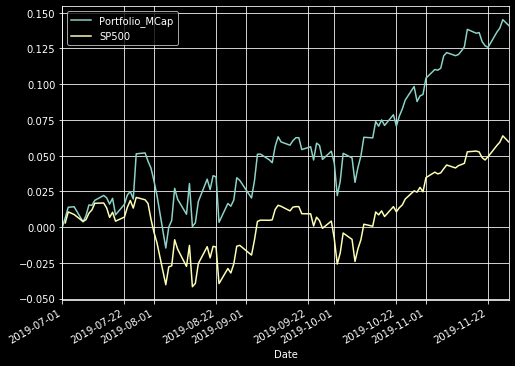

In [143]:
mcap_weights = np.array(markCap)/np.array(markCap).sum()

period_pct = period_price.pct_change()

period_pct['Portfolio_MCap'] = period_pct.iloc[:, :].mul(mcap_weights, axis=1).sum(axis=1)
CumulativeReturns = ((1+period_pct['Portfolio_MCap']).cumprod()-1) 
sp500_pct = sp500_df.loc['2019-07-01':,:].pct_change()
CummulativeSp500 = ((1+sp500_pct).cumprod()-1)
CummulativeSp500.columns = ['SP500']
CummulativePlot = CumulativeReturns.to_frame().join(CummulativeSp500)
CummulativePlot.plot(figsize = (8, 6), grid=True)

# WHICH STOCKS IS LOOSING?

In [117]:
def choosing_features(features):
    data_df = pd.read_csv('SP500_stats2.csv')
    #data_df = main_df2.copy()
    data_df = data_df.reindex(np.random.permutation(data_df.index))
    X = data_df[features].values.reshape(len(data_df), 19)
    y = data_df['Status'].replace('underperform', 0).replace('outperform', 1).values
    X = preprocessing.scale(X)
    Z = data_df[['stock_change', 'sp500_change']].values
    return X, y

def Analysis(features=FEATURES):
    X, y = choosing_features(features)
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X, y)
    
    data_df = forward_df_na.copy()
    #data_df.loc[data_df.groupby('Ticker').apply(lambda x : x.index.max()),]
    data_df = data_df.iloc[data_df.groupby('Ticker').apply(lambda x: x.tail(1)).droplevel(0).index]
    X = data_df[FEATURES]
    X = X.apply(pd.to_numeric, errors="coerce").fillna(0)
    X = X.values.reshape(len(data_df), 19)
    X = preprocessing.scale(X)
    Z = data_df['Ticker'].values
    
    underp_list = []
    prediction = clf.predict(X)
    for i in range(len(prediction)):
        if prediction[i] == 0:
            underp_list.append(Z[i])
    print(len(underp_list))        
    print(underp_list)
    return underp_list

#underp_list = Analysis(features=FEATURES)

final_list = []
loops = 10
for x in range(loops):
    stock_list = Analysis(features=FEATURES)
    for e in stock_list:
        final_list.append(e)
        
x = Counter(final_list)
loosing_tickers = []
for each in x:
    if x[each] > (loops - loops/2):
        loosing_tickers.append(each)
print(loosing_tickers)

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


278
['AAL', 'AAP', 'ABC', 'ADM', 'ADS', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'ALB', 'ALK', 'ALL', 'AMAT', 'AMCR', 'AMG', 'AMP', 'ANTM', 'AOS', 'APA', 'APTV', 'ARNC', 'AXP', 'AZO', 'BAC', 'BBT', 'BBY', 'BK', 'BKR', 'BLL', 'BWA', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBS', 'CCL', 'CE', 'CF', 'CFG', 'CHRW', 'CHTR', 'CI', 'CINF', 'CMA', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COST', 'COTY', 'CPB', 'CPRI', 'CTL', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CXO', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLTR', 'DOW', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EBAY', 'ED', 'EIX', 'EMN', 'EMR', 'EOG', 'ES', 'ETFC', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD', 'EXPE', 'F', 'FBHS', 'FCX', 'FDX', 'FE', 'FITB', 'FLS', 'FMC', 'FOX', 'FOXA', 'FTI', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GPC', 'GPS', 'GS', 'HAL', 'HBAN', 'HBI', 'HCA', 'HES', 'HFC', 'HIG', 'HII', 'HLT', 'HOG', 'HP', 'HPE', 'HRB', 'HRL', 'HSIC', 'HST', 'HUM', 'IBM', 'IFF', 'IP', 'IPG', 

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


280
['AAL', 'AAP', 'ABC', 'ADM', 'ADS', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'ALB', 'ALK', 'ALL', 'AMCR', 'AMG', 'AMP', 'ANTM', 'APA', 'APTV', 'ARNC', 'AXP', 'AZO', 'BA', 'BAC', 'BBT', 'BK', 'BKR', 'BLL', 'BMY', 'BSX', 'BWA', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBS', 'CCL', 'CE', 'CF', 'CFG', 'CHRW', 'CHTR', 'CI', 'CINF', 'CMA', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COP', 'COST', 'COTY', 'CPB', 'CPRI', 'CSX', 'CTL', 'CTVA', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DISCA', 'DISCK', 'DISH', 'DLTR', 'DOV', 'DOW', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EBAY', 'ED', 'EIX', 'EMN', 'EMR', 'ES', 'ETFC', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPE', 'F', 'FBHS', 'FCX', 'FDX', 'FE', 'FITB', 'FLS', 'FMC', 'FOX', 'FOXA', 'FTI', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GPC', 'GPS', 'GS', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA', 'HES', 'HFC', 'HIG', 'HLT', 'HOG', 'HP', 'HPE', 'HRB', 'HUM', 'IBM', 'ICE', 'IFF', 'IP', 'IPG', 'IQV', 'IR', 'IRM', '

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


284
['AAL', 'AAP', 'ABC', 'ADM', 'ADS', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'ALB', 'ALK', 'ALL', 'AMAT', 'AMCR', 'AMG', 'AMP', 'ANTM', 'AOS', 'APA', 'APTV', 'ARNC', 'AXP', 'BA', 'BAC', 'BBT', 'BBY', 'BK', 'BKR', 'BLL', 'BWA', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBRE', 'CBS', 'CCL', 'CE', 'CF', 'CFG', 'CHRW', 'CHTR', 'CI', 'CINF', 'CMA', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COP', 'COTY', 'CPB', 'CPRI', 'CTL', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CXO', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DISCA', 'DISCK', 'DISH', 'DLTR', 'DOV', 'DOW', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EBAY', 'ED', 'EIX', 'EMN', 'EMR', 'EOG', 'ES', 'ETFC', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD', 'EXPE', 'F', 'FBHS', 'FCX', 'FDX', 'FE', 'FITB', 'FLS', 'FMC', 'FOX', 'FOXA', 'FTI', 'FTV', 'GD', 'GE', 'GIS', 'GL', 'GLW', 'GM', 'GPC', 'GPS', 'GS', 'HAL', 'HBAN', 'HBI', 'HCA', 'HES', 'HFC', 'HIG', 'HII', 'HLT', 'HOG', 'HP', 'HPE', 'HRL', 'HSIC', 'HST', 'HUM', 'IBM', 'IFF', 'IP', 'IPG', 'IQV', 'I

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


282
['AAL', 'AAP', 'ABC', 'ADM', 'ADS', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'ALB', 'ALK', 'ALL', 'AMCR', 'AMG', 'AMP', 'ANTM', 'AOS', 'APA', 'ARNC', 'AVGO', 'AXP', 'BAC', 'BAX', 'BBT', 'BBY', 'BEN', 'BK', 'BKR', 'BLL', 'BMY', 'BSX', 'BWA', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBRE', 'CBS', 'CCL', 'CF', 'CFG', 'CHRW', 'CHTR', 'CI', 'CINF', 'CMA', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COP', 'COST', 'COTY', 'CPB', 'CPRI', 'CSX', 'CTL', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLTR', 'DOV', 'DOW', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'ED', 'EIX', 'EMN', 'EMR', 'ES', 'ETFC', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD', 'EXPE', 'F', 'FBHS', 'FCX', 'FDX', 'FE', 'FITB', 'FLS', 'FMC', 'FOX', 'FOXA', 'FTI', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GPC', 'GPS', 'GS', 'HAL', 'HBAN', 'HBI', 'HCA', 'HES', 'HFC', 'HIG', 'HLT', 'HOG', 'HP', 'HPE', 'HPQ', 'HSIC', 'HST', 'HUM', 'IBM', 'IFF', 'IP', 'I

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


276
['AAL', 'AAP', 'ABC', 'ADM', 'ADS', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'ALB', 'ALK', 'ALL', 'AMAT', 'AMCR', 'AMG', 'AMP', 'ANTM', 'APA', 'APTV', 'ARNC', 'AVY', 'AXP', 'AZO', 'BAC', 'BBT', 'BBY', 'BK', 'BKR', 'BLL', 'BWA', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBRE', 'CBS', 'CCL', 'CF', 'CFG', 'CHRW', 'CHTR', 'CI', 'CINF', 'CMA', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COP', 'COTY', 'CPB', 'CPRI', 'CSX', 'CTL', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DISCA', 'DISCK', 'DISH', 'DLTR', 'DOW', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EBAY', 'ED', 'EIX', 'EMN', 'EMR', 'ES', 'ETFC', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD', 'EXPE', 'F', 'FBHS', 'FCX', 'FDX', 'FE', 'FITB', 'FLS', 'FMC', 'FOX', 'FOXA', 'FTI', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GPC', 'GPS', 'GS', 'HAL', 'HBAN', 'HBI', 'HCA', 'HES', 'HFC', 'HIG', 'HLT', 'HOG', 'HP', 'HPE', 'HPQ', 'HSIC', 'HST', 'HUM', 'IBM', 'IFF', 'IP', 'IPG', 'IQV', 'IRM', '

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


290
['AAL', 'AAP', 'ABC', 'ADM', 'ADS', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'ALB', 'ALK', 'ALL', 'AMAT', 'AMCR', 'AMG', 'AMP', 'ANTM', 'AOS', 'APA', 'APTV', 'ARNC', 'AXP', 'AZO', 'BAC', 'BAX', 'BBT', 'BBY', 'BEN', 'BK', 'BKR', 'BLL', 'BWA', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBRE', 'CBS', 'CCL', 'CF', 'CFG', 'CHRW', 'CHTR', 'CI', 'CINF', 'CMA', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COTY', 'CPB', 'CPRI', 'CTL', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLTR', 'DOW', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EBAY', 'ED', 'EIX', 'EMN', 'EMR', 'EOG', 'ES', 'ETFC', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD', 'EXPE', 'F', 'FANG', 'FBHS', 'FCX', 'FDX', 'FE', 'FITB', 'FLS', 'FMC', 'FOX', 'FOXA', 'FTI', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GPC', 'GPS', 'GS', 'GWW', 'HAL', 'HBAN', 'HBI', 'HCA', 'HES', 'HFC', 'HIG', 'HOG', 'HP', 'HPE', 'HPQ', 'HRB', 'HRL', 'HSIC', 'HST', 'HUM', 'IBM',

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


261
['AAL', 'ABC', 'ADM', 'ADS', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AJG', 'ALB', 'ALK', 'ALL', 'AMAT', 'AMCR', 'AMG', 'AMP', 'ANTM', 'APA', 'ARNC', 'AXP', 'BA', 'BAC', 'BBT', 'BBY', 'BK', 'BKR', 'BLL', 'BWA', 'C', 'CAH', 'CAT', 'CB', 'CBS', 'CE', 'CF', 'CFG', 'CHRW', 'CHTR', 'CI', 'CINF', 'CMA', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COP', 'COTY', 'CPB', 'CPRI', 'CTL', 'CTVA', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DISCA', 'DISCK', 'DISH', 'DLTR', 'DOW', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EBAY', 'ED', 'EIX', 'EMN', 'EMR', 'EOG', 'ES', 'ETFC', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD', 'EXPE', 'F', 'FCX', 'FDX', 'FE', 'FITB', 'FMC', 'FOX', 'FOXA', 'FTI', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GPS', 'GS', 'HAL', 'HBAN', 'HBI', 'HCA', 'HES', 'HFC', 'HIG', 'HLT', 'HOG', 'HP', 'HPE', 'HST', 'HUM', 'IBM', 'IFF', 'IP', 'IPG', 'IQV', 'IRM', 'IVZ', 'JCI', 'JEC', 'JNPR', 'JPM', 'JWN', 'K', 'KEY', 'KHC', 'KIM', 'KMI', 'KMX', 'KR', 'KSS', 'L'

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


293
['AAL', 'AAP', 'ABC', 'ACN', 'ADM', 'ADS', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'ALB', 'ALK', 'ALL', 'AMAT', 'AMCR', 'AMG', 'AMP', 'ANTM', 'AOS', 'APA', 'APTV', 'ARNC', 'AXP', 'AZO', 'BAC', 'BBT', 'BBY', 'BK', 'BKR', 'BLL', 'BWA', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBRE', 'CBS', 'CCI', 'CCL', 'CF', 'CFG', 'CHRW', 'CHTR', 'CI', 'CINF', 'CMA', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COP', 'COST', 'COTY', 'CPB', 'CPRI', 'CTL', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DISCA', 'DISCK', 'DISH', 'DLTR', 'DOV', 'DOW', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EBAY', 'ED', 'EIX', 'EMN', 'EMR', 'EOG', 'EQR', 'ES', 'ETFC', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD', 'EXPE', 'F', 'FBHS', 'FCX', 'FDX', 'FE', 'FITB', 'FLS', 'FMC', 'FOX', 'FOXA', 'FTI', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GPC', 'GPS', 'GS', 'HAL', 'HBAN', 'HBI', 'HCA', 'HES', 'HFC', 'HIG', 'HLT', 'HOG', 'HP', 'HPE', 'HPQ', 'HRB', 'HRL', 'HSIC', 'HST',

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


281
['AAL', 'AAP', 'ABC', 'ADM', 'ADS', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'ALB', 'ALK', 'ALL', 'AMAT', 'AMCR', 'AMG', 'AMP', 'ANTM', 'APA', 'APTV', 'ARNC', 'AXP', 'AZO', 'BAC', 'BBT', 'BBY', 'BEN', 'BK', 'BKR', 'BLL', 'BWA', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBS', 'CE', 'CF', 'CFG', 'CHRW', 'CHTR', 'CI', 'CINF', 'CMA', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COTY', 'CPB', 'CPRI', 'CRM', 'CTL', 'CTSH', 'CTVA', 'CVS', 'CXO', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DISCA', 'DISCK', 'DISH', 'DLTR', 'DOV', 'DOW', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EBAY', 'ED', 'EIX', 'EMN', 'EMR', 'EOG', 'ES', 'ETFC', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD', 'EXPE', 'F', 'FBHS', 'FCX', 'FDX', 'FE', 'FIS', 'FITB', 'FLS', 'FMC', 'FOX', 'FOXA', 'FRC', 'FTI', 'FTV', 'GD', 'GE', 'GIS', 'GL', 'GLW', 'GM', 'GPC', 'GPS', 'GS', 'HAL', 'HBAN', 'HBI', 'HCA', 'HES', 'HFC', 'HIG', 'HII', 'HOG', 'HP', 'HPE', 'HRB', 'HRL', 'HSIC', 'HST', 'HUM', 'IBM', 'ICE', 'IFF', 'IP', 'IPG', 'IQV

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


283
['AAL', 'ABC', 'ADM', 'ADS', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'ALB', 'ALK', 'ALL', 'AMAT', 'AMCR', 'AMG', 'AMP', 'ANTM', 'AOS', 'APA', 'APTV', 'ARNC', 'AWK', 'AXP', 'BAC', 'BAX', 'BBT', 'BBY', 'BK', 'BKR', 'BLL', 'BMY', 'BWA', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBRE', 'CBS', 'CCL', 'CE', 'CF', 'CFG', 'CHRW', 'CHTR', 'CI', 'CINF', 'CMA', 'CMCSA', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COST', 'COTY', 'CPB', 'CPRI', 'CSX', 'CTL', 'CTSH', 'CTVA', 'CVS', 'CXO', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DISCA', 'DISCK', 'DISH', 'DLTR', 'DOV', 'DOW', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EBAY', 'ED', 'EIX', 'EMN', 'EMR', 'ES', 'ETFC', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPE', 'F', 'FCX', 'FDX', 'FE', 'FITB', 'FLS', 'FMC', 'FOX', 'FOXA', 'FRC', 'FTI', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GPC', 'GPS', 'GS', 'GWW', 'HAL', 'HBAN', 'HBI', 'HCA', 'HES', 'HFC', 'HIG', 'HLT', 'HOG', 'HP', 'HPE', 'HRB', 'HST', 'HUM', 'IBM', 'ICE', 'IFF', 'IP', 'IPG', 'IQV', 

/Users/Mavis/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [118]:
url2= 'https://finance.yahoo.com/quote/{}/key-statistics?p={}'

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:69.0) Gecko/20100101 Firefox/69.0'}

loosing_tickers = ['AAL', 'AAP', 'ABC', 'ADM', 'ADS', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'ALB', 'ALK', 'ALL', 'AMAT', 'AMCR', 'AMG', 'AMP', 'ANTM', 'AOS', 'APA', 'APTV', 'ARNC', 'AXP', 'AZO', 'BAC', 'BBT', 'BBY', 'BK', 'BKR', 'BLL', 'BWA', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBS', 'CCL', 'CE', 'CF', 'CFG', 'CHRW', 'CHTR', 'CI', 'CINF', 'CMA', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COTY', 'CPB', 'CPRI', 'CTL', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CXO', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DISCA', 'DISCK', 'DISH', 'DLTR', 'DOW', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EBAY', 'ED', 'EIX', 'EMN', 'EMR', 'EOG', 'ES', 'ETFC', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD', 'EXPE', 'F', 'FBHS', 'FCX', 'FDX', 'FE', 'FITB', 'FLS', 'FMC', 'FOX', 'FOXA', 'FTI', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GPC', 'GPS', 'GS', 'HAL', 'HBAN', 'HBI', 'HCA', 'HES', 'HFC', 'HIG', 'HLT', 'HOG', 'HP', 'HPE', 'HRB', 'HSIC', 'HST', 'HUM', 'IBM', 'IFF', 'IP', 'IPG', 'IQV', 'IR', 'IRM', 'IVZ', 'JCI', 'JEC', 'JNPR', 'JWN', 'K', 'KEY', 'KHC', 'KIM', 'KMI', 'KMX', 'KR', 'KSS', 'L', 'LB', 'LDOS', 'LEG', 'LEN', 'LH', 'LHX', 'LKQ', 'LNC', 'LNT', 'LUV', 'LVS', 'LYB', 'M', 'MAR', 'MCK', 'MET', 'MGM', 'MHK', 'MMC', 'MO', 'MOS', 'MPC', 'MRO', 'MS', 'MTB', 'MU', 'MYL', 'NBL', 'NCLH', 'NEM', 'NI', 'NLOK', 'NLSN', 'NOV', 'NRG', 'NTRS', 'NUE', 'NWL', 'NWS', 'NWSA', 'OKE', 'OXY', 'PBCT', 'PCAR', 'PEAK', 'PEG', 'PFG', 'PGR', 'PH', 'PHM', 'PKG', 'PNC', 'PNW', 'PPL', 'PRGO', 'PRU', 'PSX', 'PVH', 'PWR', 'PXD', 'QRVO', 'RCL', 'RE', 'RF', 'RHI', 'RJF', 'RL', 'RSG', 'RTN', 'SEE', 'SJM', 'SLB', 'SO', 'SRE', 'STI', 'STT', 'STX', 'SWK', 'SYF', 'T', 'TAP', 'TMUS', 'TPR', 'TRV', 'TSCO', 'TSN', 'TXT', 'UA', 'UAA', 'UAL', 'UHS', 'UNM', 'URI', 'USB', 'UTX', 'VIAB', 'VLO', 'WAB', 'WBA', 'WCG', 'WDC', 'WFC', 'WHR', 'WLTW', 'WM', 'WMB', 'WRK', 'WU', 'WY', 'WYNN', 'XEC', 'XEL', 'XOM', 'XRAY', 'XRX', 'XYL', 'ZBH', 'ZION', 'COP', 'D', 'DOV', 'MDLZ', 'NOC', 'PNR', 'SNA', 'TGT', 'VZ', 'CBRE', 'JPM']

def get_markCap(tickers):
    markCap = []
    for ticker in tickers:
        resp = requests.get(url2.format(ticker, ticker), headers=headers)
        time.sleep(3)
        
        if resp.status_code == requests.codes.ok:
            bs = BeautifulSoup(resp.text, "lxml")
        
            table = bs.find('div', {'class': "IbBox W(40%)"})
            body = table.find('tbody')
            row = body.findAll('tr')[0]
            if row.find('td', {'class': "Fz(s) Fw(500) Ta(end) Pstart(10px) Miw(60px)"}).text == 'N/A':
                markCap.append("NA")
            else:
                try:
                    text = float(row.find('td', {'class': "Fz(s) Fw(500) Ta(end) Pstart(10px) Miw(60px)"}).text.split('B')[0])
                except:
                    text = float(row.find('td', {'class': "Fz(s) Fw(500) Ta(end) Pstart(10px) Miw(60px)"}).text.split('T')[0])*1000
               
                    
                markCap.append(text)
    return markCap
markCapL = get_markCap(loosing_tickers)

In [119]:
np.array(markCapL)

array(['12.5', '9.25', '19.43', '24.92', '4.74', '21.35', '51.25', '13.9',
       '38.38', '65.1', '42.18', '8.64', '20.55', '9.5', '8.13', '40.03',
       '61.41', '16.38', '4.08', '22.16', '75.52', '7.17', '10.29',
       '22.55', '14.44', '110.05', '24.85', '307.94', '72.75', '23.34',
       '41.34', '22.66', '25.26', '7.05', '166.57', '15.91', '17.4',
       '76.26', '74.38', 'NA', '30.25', '13.15', '8.27', '16.75', '9.74',
       '112.31', '81.82', '18.77', '8.87', '25.06', '19.45', '38.0',
       '13.65', '46.87', '5.89', '8.68', '14.67', '4.27', '15.15',
       '37.46', '22.99', '92.85', '208.15', '15.67', '37.7', '39.22',
       '52.91', '23.69', '40.23', '14.97', '22.64', '15.37', '15.37',
       '20.91', '20.99', '36.07', '14.79', '25.76', '73.84', '10.79',
       '8.77', '7.82', '30.36', '31.35', '27.66', '10.16', '44.98',
       '43.59', '30.91', '9.84', '42.81', '26.71', '16.49', '48.48',
       '12.5', '17.51', '32.12', '10.16', '17.76', '41.42', '28.24',
       '20.98', 

In [131]:
markCapL.remove("NA")

In [132]:
markCapL = np.array(markCapL).astype(np.float)

In [134]:
loosing_tickers[39]

'CBS'

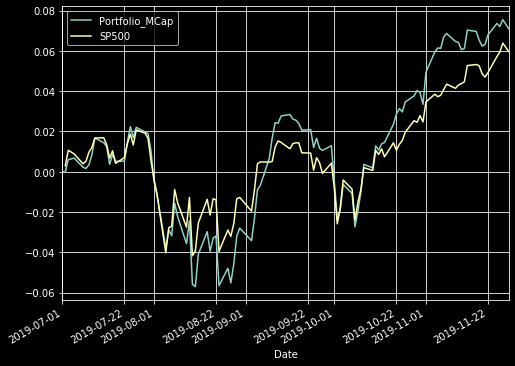

In [142]:
mcap_weightsL = np.array(markCapL)/np.array(markCapL).sum()

period_priceL = sp500_pr[loosing_tickers].loc['2019-07-01':,:]

period_pctL = period_priceL.pct_change()

period_pctL['Portfolio_MCap'] = period_pctL.iloc[:, :].mul(mcap_weightsL, axis=1).sum(axis=1)
CumulativeReturnsL = ((1+period_pctL['Portfolio_MCap']).cumprod()-1) 
sp500_pct = sp500_df.loc['2019-07-01':,:].pct_change()
CummulativeSp500 = ((1+sp500_pct).cumprod()-1)
CummulativeSp500.columns = ['SP500']
CummulativePlotL = CumulativeReturnsL.to_frame().join(CummulativeSp500)
CummulativePlotL.plot(figsize = (8, 6), grid=True)